# D208 P.A. : TASK 2 LOGISTIC REGRESSION FOR PREDICTIVE MODELING

<a href="https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=8a3aa9f0-8b69-438a-a653-ad0b013b2b44" target="_blank"> Link to the Panopto Video </a>

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=8a3aa9f0-8b69-438a-a653-ad0b013b2b44

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Part I: Research Question

#### A.  Describe the purpose of this data analysis by doing the following:

##### 1.  Summarize one research question that is relevant to a real-world organizational situation captured in the data set you have selected and that you will answer using logistic regression.

“Given that it costs 10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many providers, retaining highly profitable customers is the number one business goal. To reduce customer churn, telecommunications companies need to predict which customers are at high risk of churn.” (D207 D208 D209 Churn Data Consideration and Dictionary.pdf) In addition to prediction, the company may be interested in finding the main factors that may affect the churn possibility positively and negatively, therefore taking the right actions to deal with those factors. The analysis of the data would give the company and the stakeholders a good idea about these factors and the degree of their reliability.

The question to be asked is about recognizing which variables have a relationship with the customer's Churn, and using these relationships to predict customers churn probability

logistic regression will be used to check the factors and features that affect the customers churn probability and to build a prediction model based on these features.

##### 2.  Define the objectives or goals of the data analysis. Ensure that your objectives or goals are reasonable within the scope of the data dictionary and are represented in the available data.

the churn probability of each customer may depend on several factors such as customer satisfaction, services quality and price. etc, some of these factors may be more important than others. and more significant than others. 
the objective of the data analysis is to identify these features and to test their significance in order to build a logistic regression prediction model that can be used to predict the customer churn probability based on available features or criteria. thus giving the stakeholders the insight to avoid the negative factors and to support the positive ones that may decrease the customers churn probability.

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Part II: Method Justification

#### B.  Describe logistic regression methods by doing the following:

##### 1.  Summarize the assumptions of a logistic regression model.

APPROPRIATE OUTCOME STRUCTURE
Binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

OBSERVATION INDEPENDENCE
Logistic regression requires the observations to be independent of each other. In other words, the observations should not come from repeated measurements or matched data.

ABSENCE OF MULTICOLLINEARITY
Logistic regression requires there to be little or no multicollinearity among the independent variables. This means that the independent variables should not be too highly correlated with each other.

LINEARITY OF INDEPENDENT VARIABLES AND LOG ODDS
Logistic regression assumes linearity of independent variables and log odds. Although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.

LARGE SAMPLE SIZE
logistic regression typically requires a large sample size. A general guideline is that you need at minimum of 10 cases with the least frequent outcome for each independent variable in your model. For example, if you have 5 independent variables and the expected probability of your least frequent outcome is .10, then you would need a minimum sample size of 500 (10*5 / .10).


https://www.statology.org/assumptions-of-logistic-regression/

https://www.lexjansen.com/wuss/2018/130_Final_Paper_PDF.pdf#:~:text=Logistic%20and%20Linear%20Regression%20Assumptions%3A%20Violation%20Recognition%20and,in%20any%20analytic%20plan%2C%20regardless%20of%20plan%20complexity.

##### 2.  Describe the benefits of using the tool(s) you have chosen (i.e., Python, R, or both) in support of various phases of the analysis.

Selected Python, the general-purpose, interpreted, object-oriented language, which supports many useful packages for creating linear models
Selected Python libraries such as:

* Pandas : For data manipulation and analysis.
* numpy : The core of every analytical solution in the Python language. It provides the user with multidimensional arrays, along with a large set of functions to operate multiple mathematical operations on these arrays.
* Matplotlib: for visualization
* SciPy: Completes NumPy's functionalities, offering a larger variety of scientific algorithms for linear algebra, sparse matrices, signal and image processing, optimization, fast Fourier transformation, and much more.
* statsmodels: It features generalized linear models, discrete choice models, and a series of descriptive statistics as well as parametric and nonparametric tests.
* Scikit-learn: Offers many functions for data preprocessing, supervised and unsupervised learning, model selection, validation, and error metrics.

##### 3.  Explain why logistic regression is an appropriate technique to analyze the research question summarized in Part I.

The Churn is a binary categorical variable (Yes/No), it's probability may depend on several factors such as customer satisfaction, services quality and price. etc, some of these factors may be more important than others. and more significant than others.

Logistic regression is an appropriate technique to check the factors and features that affect the customers churn probability and the significance of each of them, by modelling the relationship between multiple explanatory variables to the single dependent binary categorical variable ('Churn'), through classification and thus estimating the probability of the Churn to happen.


###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Exploring the Data

#### Importing Libraries:

In [1]:
#imporing the needed libraries.
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) #modified Pandas options to fully display the large dataset when needed
## !!! Trying to Display a full Dataframe may cause a problem.
import numpy as np
np.set_printoptions(precision=5, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib as mpl
import sklearn
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Reading the CSV Data:

In [2]:
#Reading the Data file (As received) churn_clean.csv 
df_raw= pd.read_csv('churn_clean.csv')
target='Churn'
df_raw.head()

CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  Population      Area             TimeZone  \
0  99927  56.25100 -133.37571          38     Urban        America/Sitka   
1  48661  44.32893  -84.24080       10446     Urban      America/Detroit   
2  97148  45.35589 -123.24657        3735     Urban  America/Los_Angeles   
3  92014  32.96687 -117.24798       13863  Suburban  America/Los_Angeles   
4  77461  29.38012  -95.80673       11352  Suburban      America/Chicago   

                                 Job  Children  Age    Income    Marital  \
0  Environmental health practitioner         0   68  28561.99    Widowed   
1             Programmer, multimedia         1   27  21704.77    Married   
2            Chief Financial Officer         4   50   9609.57    Widowed   
3                          Solicitor         1   48  18925.23    Married   
4                Medical illustrator         0   83  40074.19  Separated   

   Gender Churn  Outage_sec_perweek  Email  Contacts  Yearly_equip_failure  \
0    Male    No            7.978323     10         0                     1   
1  Female   Yes           11.699080     12         0                     1   
2  Female    No           10.752800      9         0                     1   
3    Male    No           14.913540     15         2                     0   
4    Male   Yes            8.147417     16         2                     1   

  Techie        Contract Port_modem Tablet InternetService Phone Multiple  \
0     No        One year        Yes    Yes     Fiber Optic   Yes       No   
1    Yes  Month-to-month         No    Yes     Fiber Optic   Yes      Yes   
2    Yes        Two Year        Yes     No             DSL   Yes      Yes   
3    Yes        Two Year         No     No             DSL   Yes       No   
4     No  Month-to-month        Yes     No     Fiber Optic    No       No   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0            Yes          Yes               No          No          No   
1            Yes           No               No          No         Yes   
2             No           No               No          No          No   
3            Yes           No               No          No         Yes   
4             No           No               No         Yes         Yes   

  StreamingMovies PaperlessBilling             PaymentMethod     Tenure  \
0             Yes              Yes   Credit Card (automatic)   6.795513   
1             Yes              Yes  Bank Transfer(automatic)   1.156681   
2             Yes              Yes   Credit Card (automatic)  15.754144   
3              No              Yes              Mailed Check  17.087227   
4              No               No              Mailed Check   1.670972   

   MonthlyCharge  Bandwidth_GB_Year  Item1  Item2  Item3  Item4  Item5  Item6  \
0     172.455519         904.536110      5      5      5      3      4      4   
1     242.632554         800.982766      3      4      3      3      4      3   
2     159.947583        2054.706961      4      4      2      4      4      3   
3     119.956840        2164.579412      4      4    

#### Data info:

In [3]:
df_raw.info() #Data Information of the Raw DataFrame (As received)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
raw_variables=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
               'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
               'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
               'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
               'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
               'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
               'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
               'Item6', 'Item7', 'Item8']

num_variables = ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children',
                 'Age','Income', 'Outage_sec_perweek', 'Email', 'Contacts',
                 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
                 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']

categ_variables = ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area',
                   'TimeZone', 'Job', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract',
                   'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

print('raw_variables:',len(raw_variables),'  num_variables:',len(num_variables),'  cat_variables:',len(categ_variables))

raw_variables: 50   num_variables: 23   cat_variables: 27


#### Summary statistics:

In [5]:
#Summary statistics of Numerical variables of the Raw DataFrame
df_raw.describe().T  #Transposed to show large number of variables displayed as rows

count          mean           std         min  \
CaseOrder             10000.0   5000.500000   2886.895680    1.000000   
Zip                   10000.0  49153.319600  27532.196108  601.000000   
Lat                   10000.0     38.757567      5.437389   17.966120   
Lng                   10000.0    -90.782536     15.156142 -171.688150   
Population            10000.0   9756.562400  14432.698671    0.000000   
Children              10000.0      2.087700      2.147200    0.000000   
Age                   10000.0     53.078400     20.698882   18.000000   
Income                10000.0  39806.926771  28199.916702  348.670000   
Outage_sec_perweek    10000.0     10.001848      2.976019    0.099747   
Email                 10000.0     12.016000      3.025898    1.000000   
Contacts              10000.0      0.994200      0.988466    0.000000   
Yearly_equip_failure  10000.0      0.398000      0.635953    0.000000   
Tenure                10000.0     34.526188     26.443063    1.000259   
MonthlyCharge         10000.0    172.624816     42.943094   79.978860   
Bandwidth_GB_Year     10000.0   3392.341550   2185.294852  155.506715   
Item1                 10000.0      3.490800      1.037797    1.000000   
Item2                 10000.0      3.505100      1.034641    1.000000   
Item3                 10000.0      3.487000      1.027977    1.000000   
Item4                 10000.0      3.497500      1.025816    1.000000   
Item5                 10000.0      3.492900      1.024819    1.000000   
Item6                 10000.0      3.497300      1.033586    1.000000   
Item7                 10000.0      3.509500      1.028502    1.000000   
Item8                 10000.0      3.495600      1.028633    1.000000   

                               25%           50%           75%            max  
CaseOrder              2500.750000   5000.500000   7500.250000   10000.000000  
Zip                   26292.500000  48869.500000  71866.500000   99929.000000  
Lat                      35.341828     39.395800     42.106908      70.640660  
Lng                     -97.082813    -87.918800    -80.088745     -65.667850  
Population              738.000000   2910.500000  13168.000000  111850.000000  
Children                  0.000000      1.000000      3.000000      10.000000  
Age                      35.000000     53.000000     71.000000      89.000000  
Income                19224.717500  33170.605000  53246.170000  258900.700000  
Outage_sec_perweek        8.018214     10.018560     11.969485      21.207230  
Email                    10.000000     12.000000     14.000000      23.000000  
Contacts                  0.000000      1.000000      2.000000       7.000000  
Yearly_equip_failure      0.000000      0.000000      1.000000       6.000000  
Tenure                    7.917694     35.430507     61.479795      71.999280  
MonthlyCharge           139.979239    167.484700    200.734725     290.160419  
Bandwidth_GB_Year      1236.470827   3279.536903   5586.141369    7158.981530  
Item1                     3.000000      3.000000      4.000000       7.000000  
Item2                     3.000000      4.000000      4.000000       7.000000  
Item3                     3.000000      3.000000      4.000000       8.000000  
Item4                     3.000000      3.000000      4.000000       7.000000  
Item5                     3.000000      3.000000      4.000000       7.000000  
Item6                     3.000000      3.000000      4.000000       8.000000  
Item7                     3.000000      4.000000      4.000000       7.000000  
Item8                     3.000000      3.000000      4.000000       8.000000

####  Data visualization:

*Function plt_summary()  to inspect the data visually usind Histogram, Boxplot and scattered plots.
The following function is defined to visually identify  statistical parameters and to get the sense from the Data, such as identify the outliers , ranges, dominant values,.etc

In [6]:
'''Custom function to inspect the data visually using Histogram/Bar, Boxplot and scattered plots
this function takes 3 parameters, 1st is DataFrame , 2nd is the preferable plot ("hist" , "box" , " scat" , "target_scat" or "target_histplot" )
The target argument will be used only in the case of target vs variables scat plots, and will not be used for other options
For Histograms with non-numeric columns , the function will use Bar charts (in Green color) instead of Histogram
"scat": plotting scatterd plot against the 1st column of the D.F.
"target_scat": plotting scatterd plot of num. variables against a 'target' column of the D.F.
"target_histplot":plotting histplot of numeric or countplot of cat. variables against the target' column 
'''

def plt_summary(df_1,plt_type,target):
    numerics = ['uint8','uint16','uint32','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
    if plt_type =='target_histplot':
        pltlist=df_1.columns
#         for number,cols in enumerate(df_1.columns):
#             if (len(df_1[cols].value_counts())>=20):
#                 pltlist.remove(cols)        
        print("Number of columns:  "+str(len(pltlist))) #Printing the number of columns.
        
    elif plt_type =='hist':
        pltlist=df_1.columns
        print("Number of columns:  "+str(df_1.shape[1])) #Printing the number of columns.
        
    else :
        df_n = df_1.select_dtypes(include=numerics).copy()   # selecting only the numeric columns as it's suitable for mentioned plots
        pltlist=df_n.columns
        print("Number of Numeric columns:  "+str(df_n.shape[1])) #Printing the number of numeric columns.

    
    plt.style.use('default')
    plt.figure(figsize=(15,30))
    plt_rows = 11
    plt_cols = 5
    
    for n, col in enumerate(pltlist):   #enumerating each column of the data, starting from index
        b=n+1
        ax=plt.subplot2grid(shape=(plt_rows,plt_cols),loc=((int(np.ceil(b/plt_cols)-1)),((b-1)%plt_cols)))
        if plt_type == 'hist':
            if df_1[col].dtype in numerics:
                ax.hist(df_1.loc[:,col],bins = 50)  #plotting Histogram
                ax.set_title(str(col)+' (*num)')
            else:
                if len(df_1[col].value_counts())>2000:
                    ax.set_title(str(col)+' ('+str(len(df_1[col].value_counts()))+' unq val.)')
                    continue
                df_1.groupby(col).size().plot.bar(rot=0,color='g') #plotting Bar chart
                ax.set_title(str(col)+' (*categ. '+str(len(df_1[col].value_counts()))+' cat.)')
                if len(df_1[col].value_counts())>20:
                    ax.tick_params(bottom=False,labelbottom=False)
                    
        elif plt_type == 'box':
            msk = ~np.isnan(df_n.loc[:,col])
            ax.boxplot(df_n.loc[msk,col])  #plotting Box plot (used a mask to filter the null values)
            #ax.boxplot(df.loc[:,col])
            ax.set_title(col)
        elif plt_type == 'scat':
            ax.scatter(df_n.iloc[:,0],df_n.loc[:,col],s=0.1,alpha=0.1) #plotting scatterd plot against the index of the D.F.
            ax.set_title(col)
            
        elif plt_type == 'target_scat':
            ax.scatter(df_n.loc[:,col],df_n.loc[:,target],s=1,alpha=0.1,color='b') #plotting scatterd plot of num. variables against the 'target' column of the D.F.
            #ax.set_title(col)
            ax.set_xlabel(col)
            
        elif plt_type == 'target_hexbin':
            ax = df_n.plot.hexbin(ax=ax,x=col, y=target,gridsize=50, sharex=False) #plotting hexbin plot
            ax.set_title(col)
            
        elif (plt_type == 'target_histplot'):
            if (df_1[target].dtype not in numerics):
                ax.set_title(str(col)+' (*categ. '+str(len(df_1[col].value_counts()))+' cat.)')
                if (len(df_1[col].value_counts())<=700):
                    sns.countplot(ax=ax, data = df_1,x = col,hue = target,alpha=0.7) #plotting countplot of cat. variables against the 'target' column
                    if len(df_1[col].value_counts())>20:
                        ax.tick_params(bottom=False,labelbottom=False)
                elif (df_1[col].dtype in numerics):
                        sns.histplot(df_1, x=col, hue=target, element="poly",ax=ax) #plotting histplot of num. variables against the 'target' column
                        ax.set_title(str(col)+' (*num)')
#                         ax.plt.legend(fontsize='xx-small', title_fontsize='xx-small')
#                         plt.setp(ax.get_legend().get_texts(), fontsize='5') # for legend text
#                         plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title                        
            elif df_1[target].dtype in numerics:
                if (df_1[col].dtype not in numerics):
                    ax.set_title(str(col)+' (*categ. '+str(len(df_1[col].value_counts()))+' cat.)')
                    if (len(df_1[col].value_counts())<=5):
                        sns.histplot(df_1, x=target, hue=col, element="poly",ax=ax) #plotting histplot of num. variables against the 'target' column
                elif (df_1[col].dtype in numerics):
                    ax = df_1.plot.hexbin(ax=ax,x=target, y=col,gridsize=30, sharex=False, cmap="cubehelix_r") #plotting hexbin plot
#                     continue
                           
            
                
    plt.tight_layout()
    plt.show() 
   
    return 

#### Converting Binary categories into numeric:

*Function cat2num() :
to convert categorical variables into serial numeric values in integer format

In [7]:
'''
Custom function to convert categorical variables into numeric form.
this function takes 1 parameters, input DataFrame and creates a dectionary for each categorical variable
where dictinary keys are the categogries sorted alphabetically and the values are serial numeric values
the maximum number of categories this function can handle is 7000
'''
def cat2num(df_1):
    numerics = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_num_conv=df_1.copy()
    for n, col in enumerate(df_num_conv.columns):
        if (df_num_conv[col].dtype in numerics) or (len(df_num_conv[col].value_counts())>7000):
            continue
        else:
            cat_dict={y:x for x,y in enumerate(dict(df_raw[col].value_counts().sort_index(ascending=True)))}
            df_num_conv[col]=df_num_conv[col].replace(cat_dict)
    return df_num_conv

In [8]:
# To be able to correlate with the categorical variables
df_num=cat2num(df_raw)

Number of columns:  50


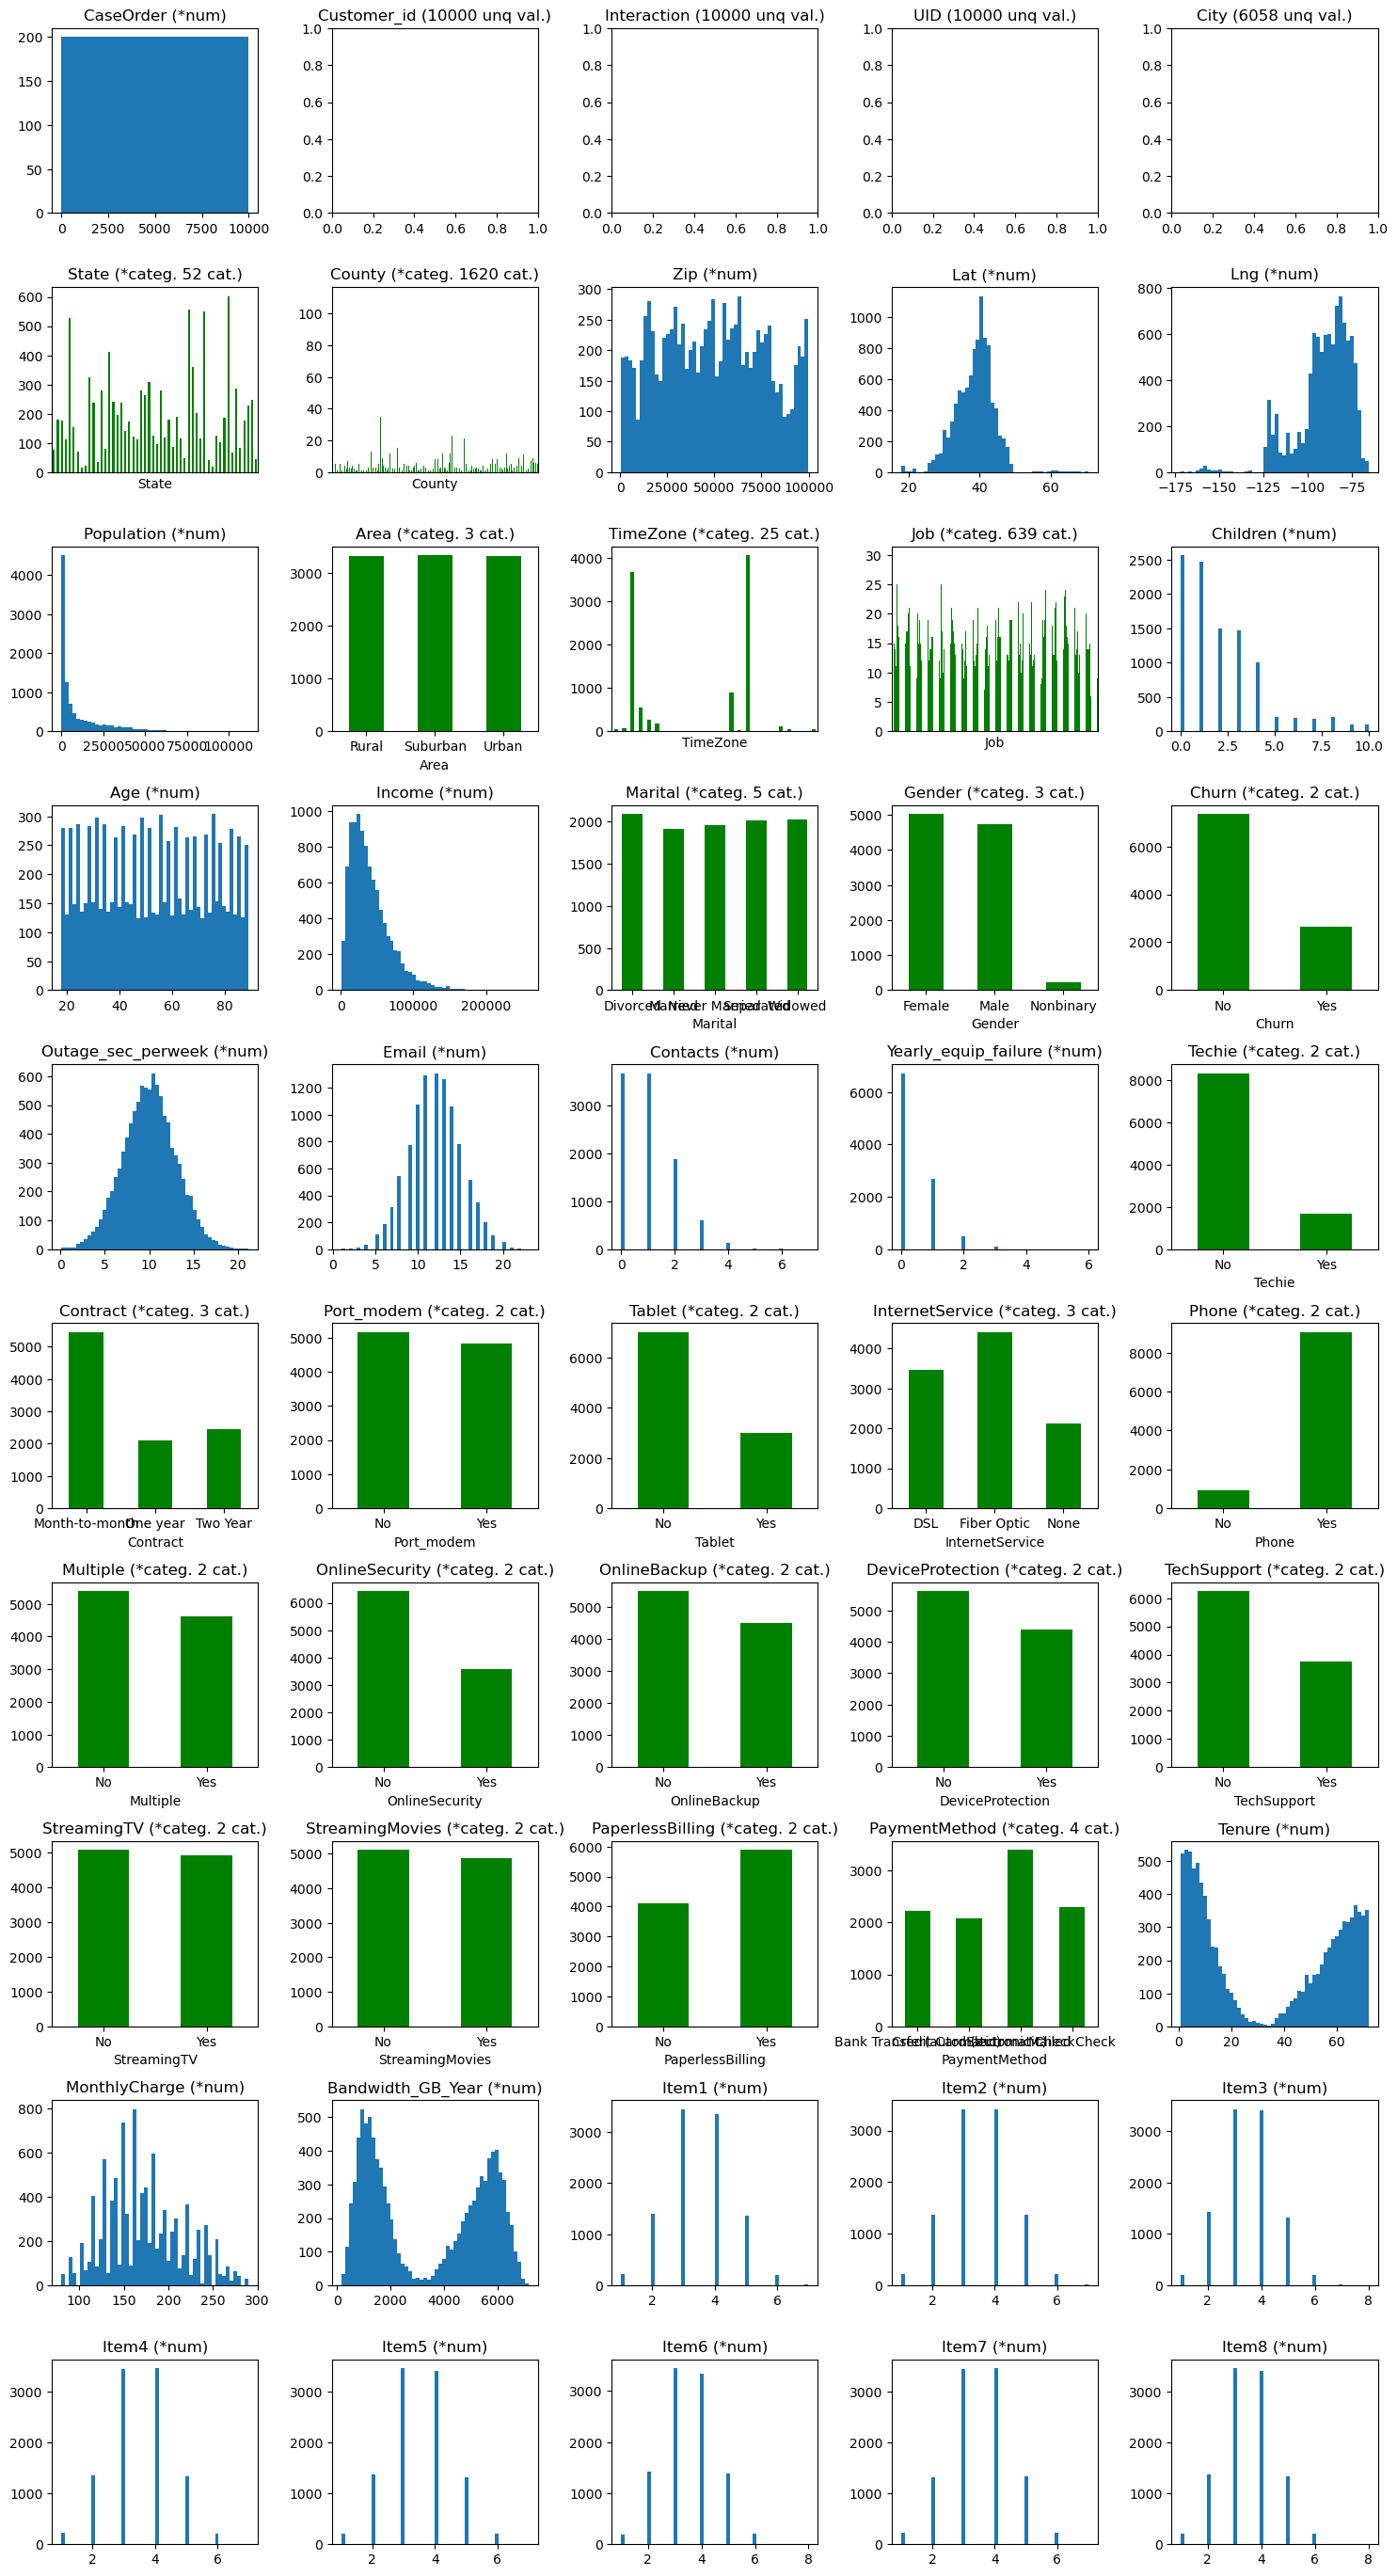

Wall time: 37.3 s


In [9]:
%%time
#calling the plt_summary to the Raw DataFrame
plt_summary(df_raw,"hist",target)

Number of columns:  50


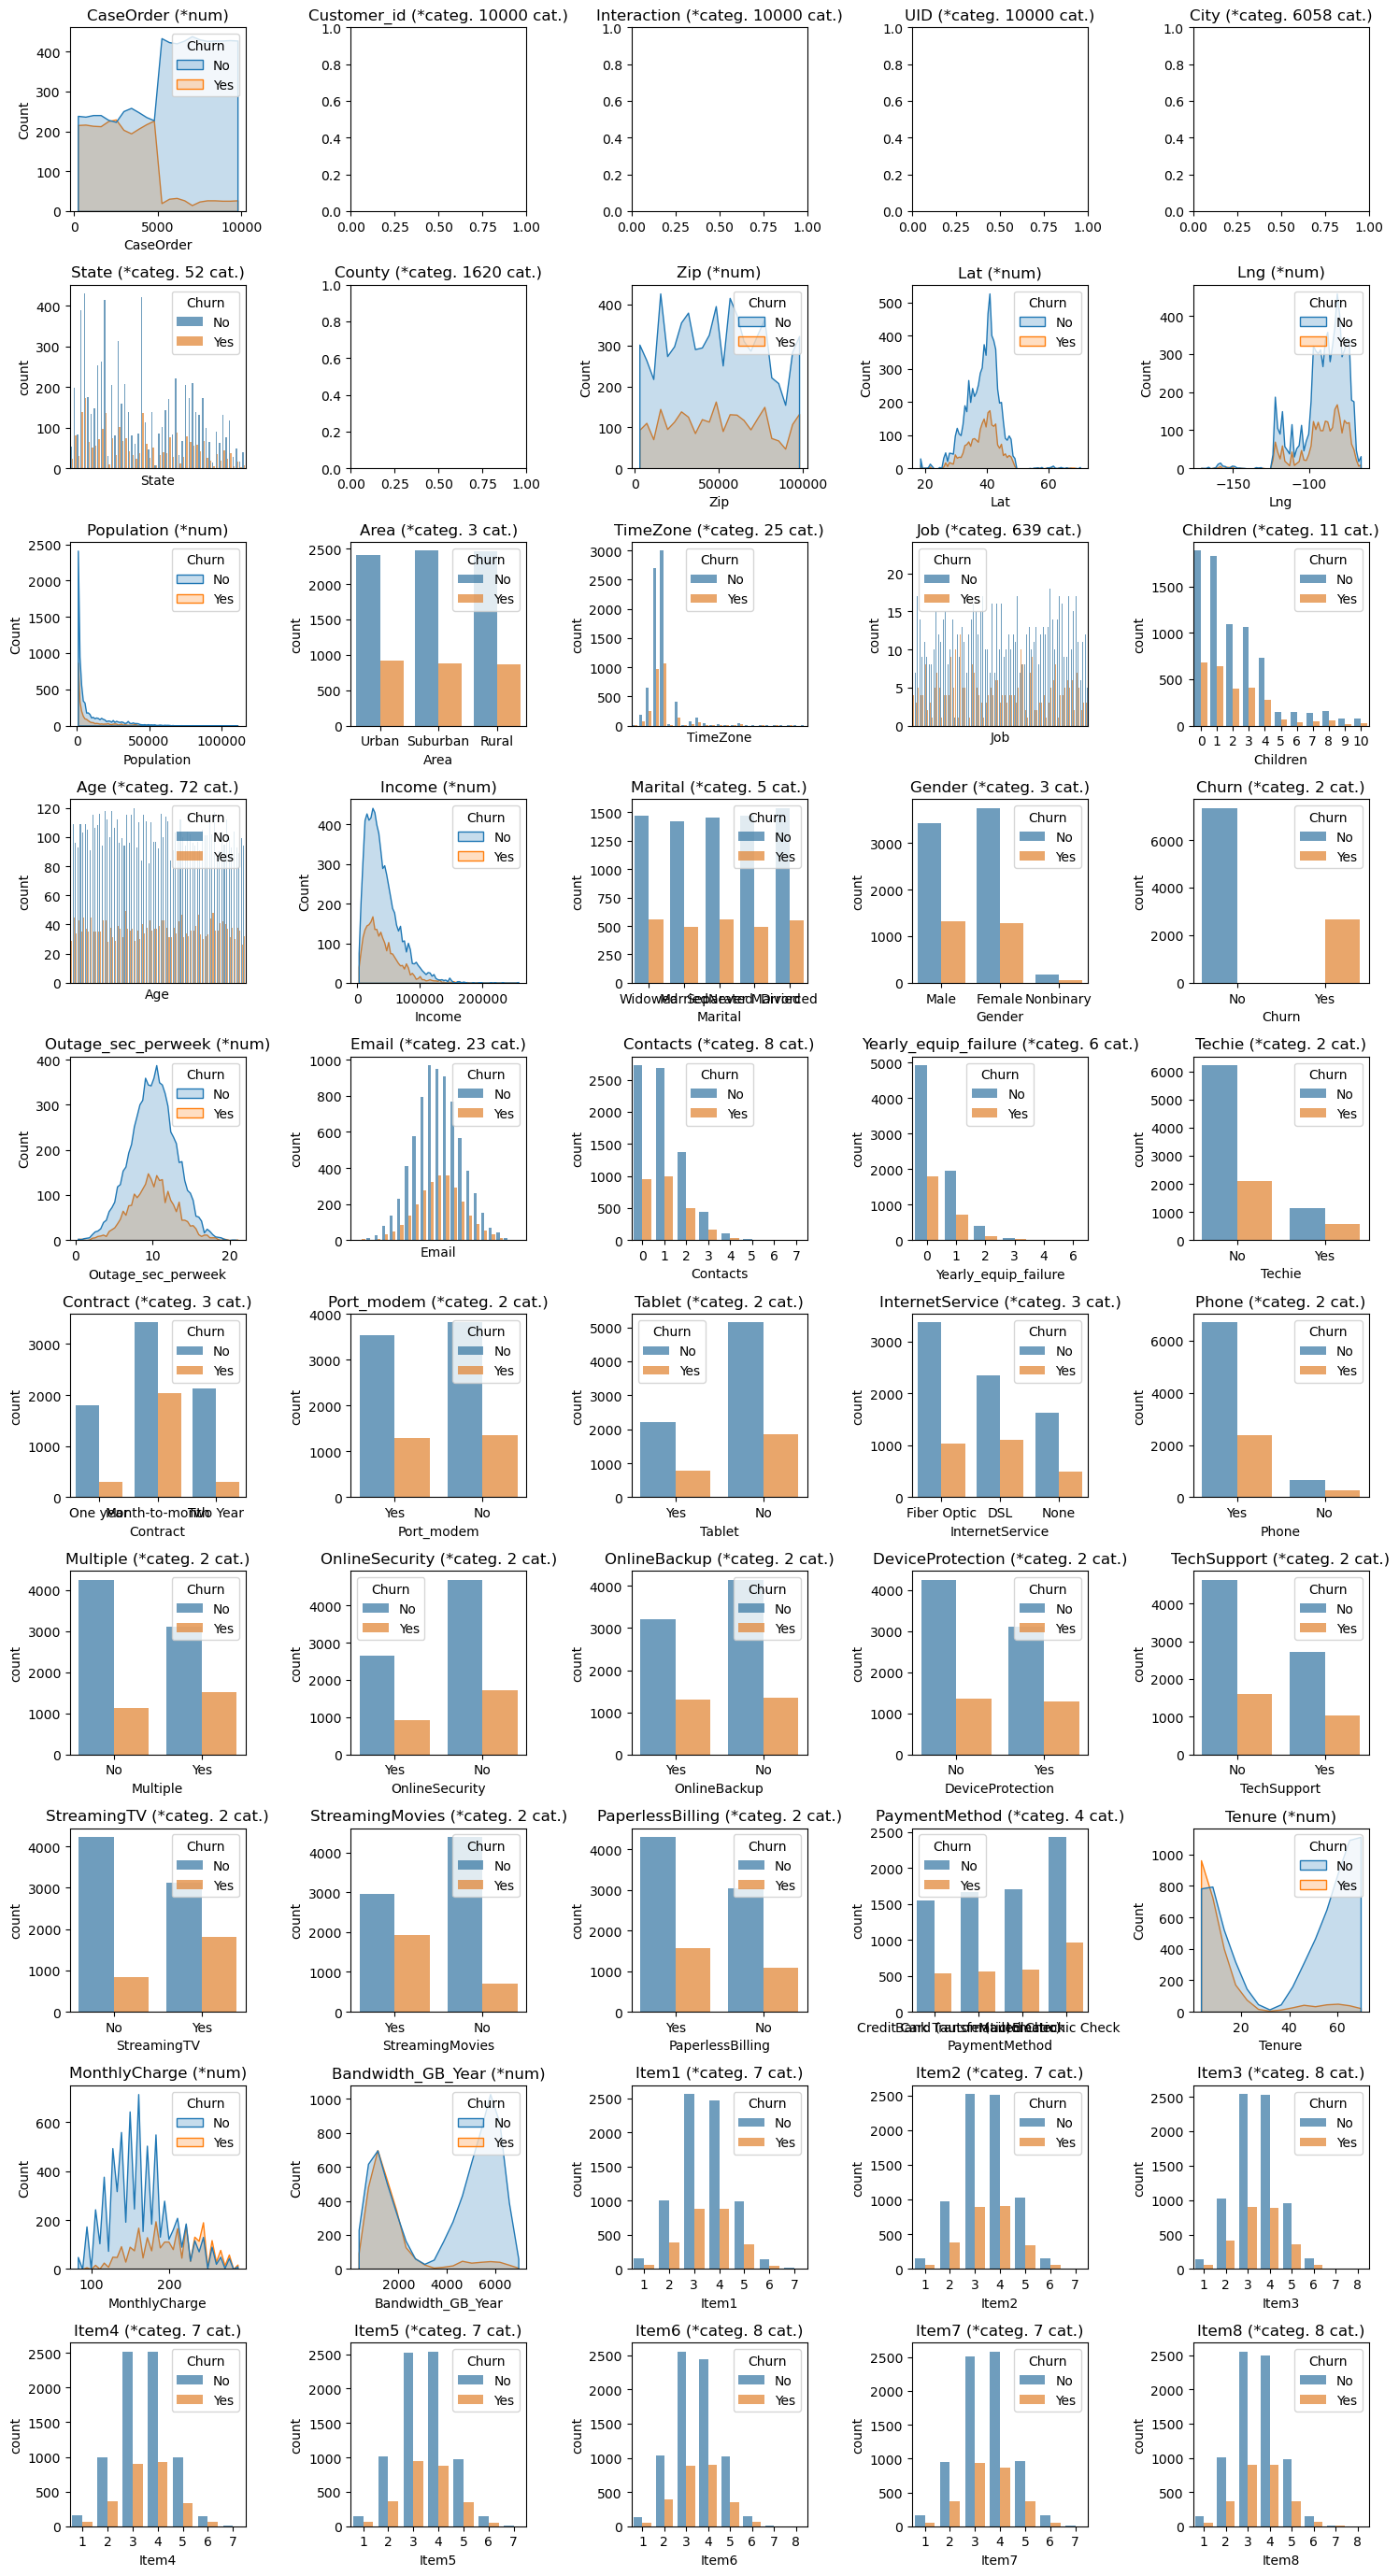

Wall time: 37.2 s


In [10]:
%%time
#calling the plt_summary to the Raw DataFrame
plt_summary(df_raw,"target_histplot",target)

Number of Numeric columns:  47


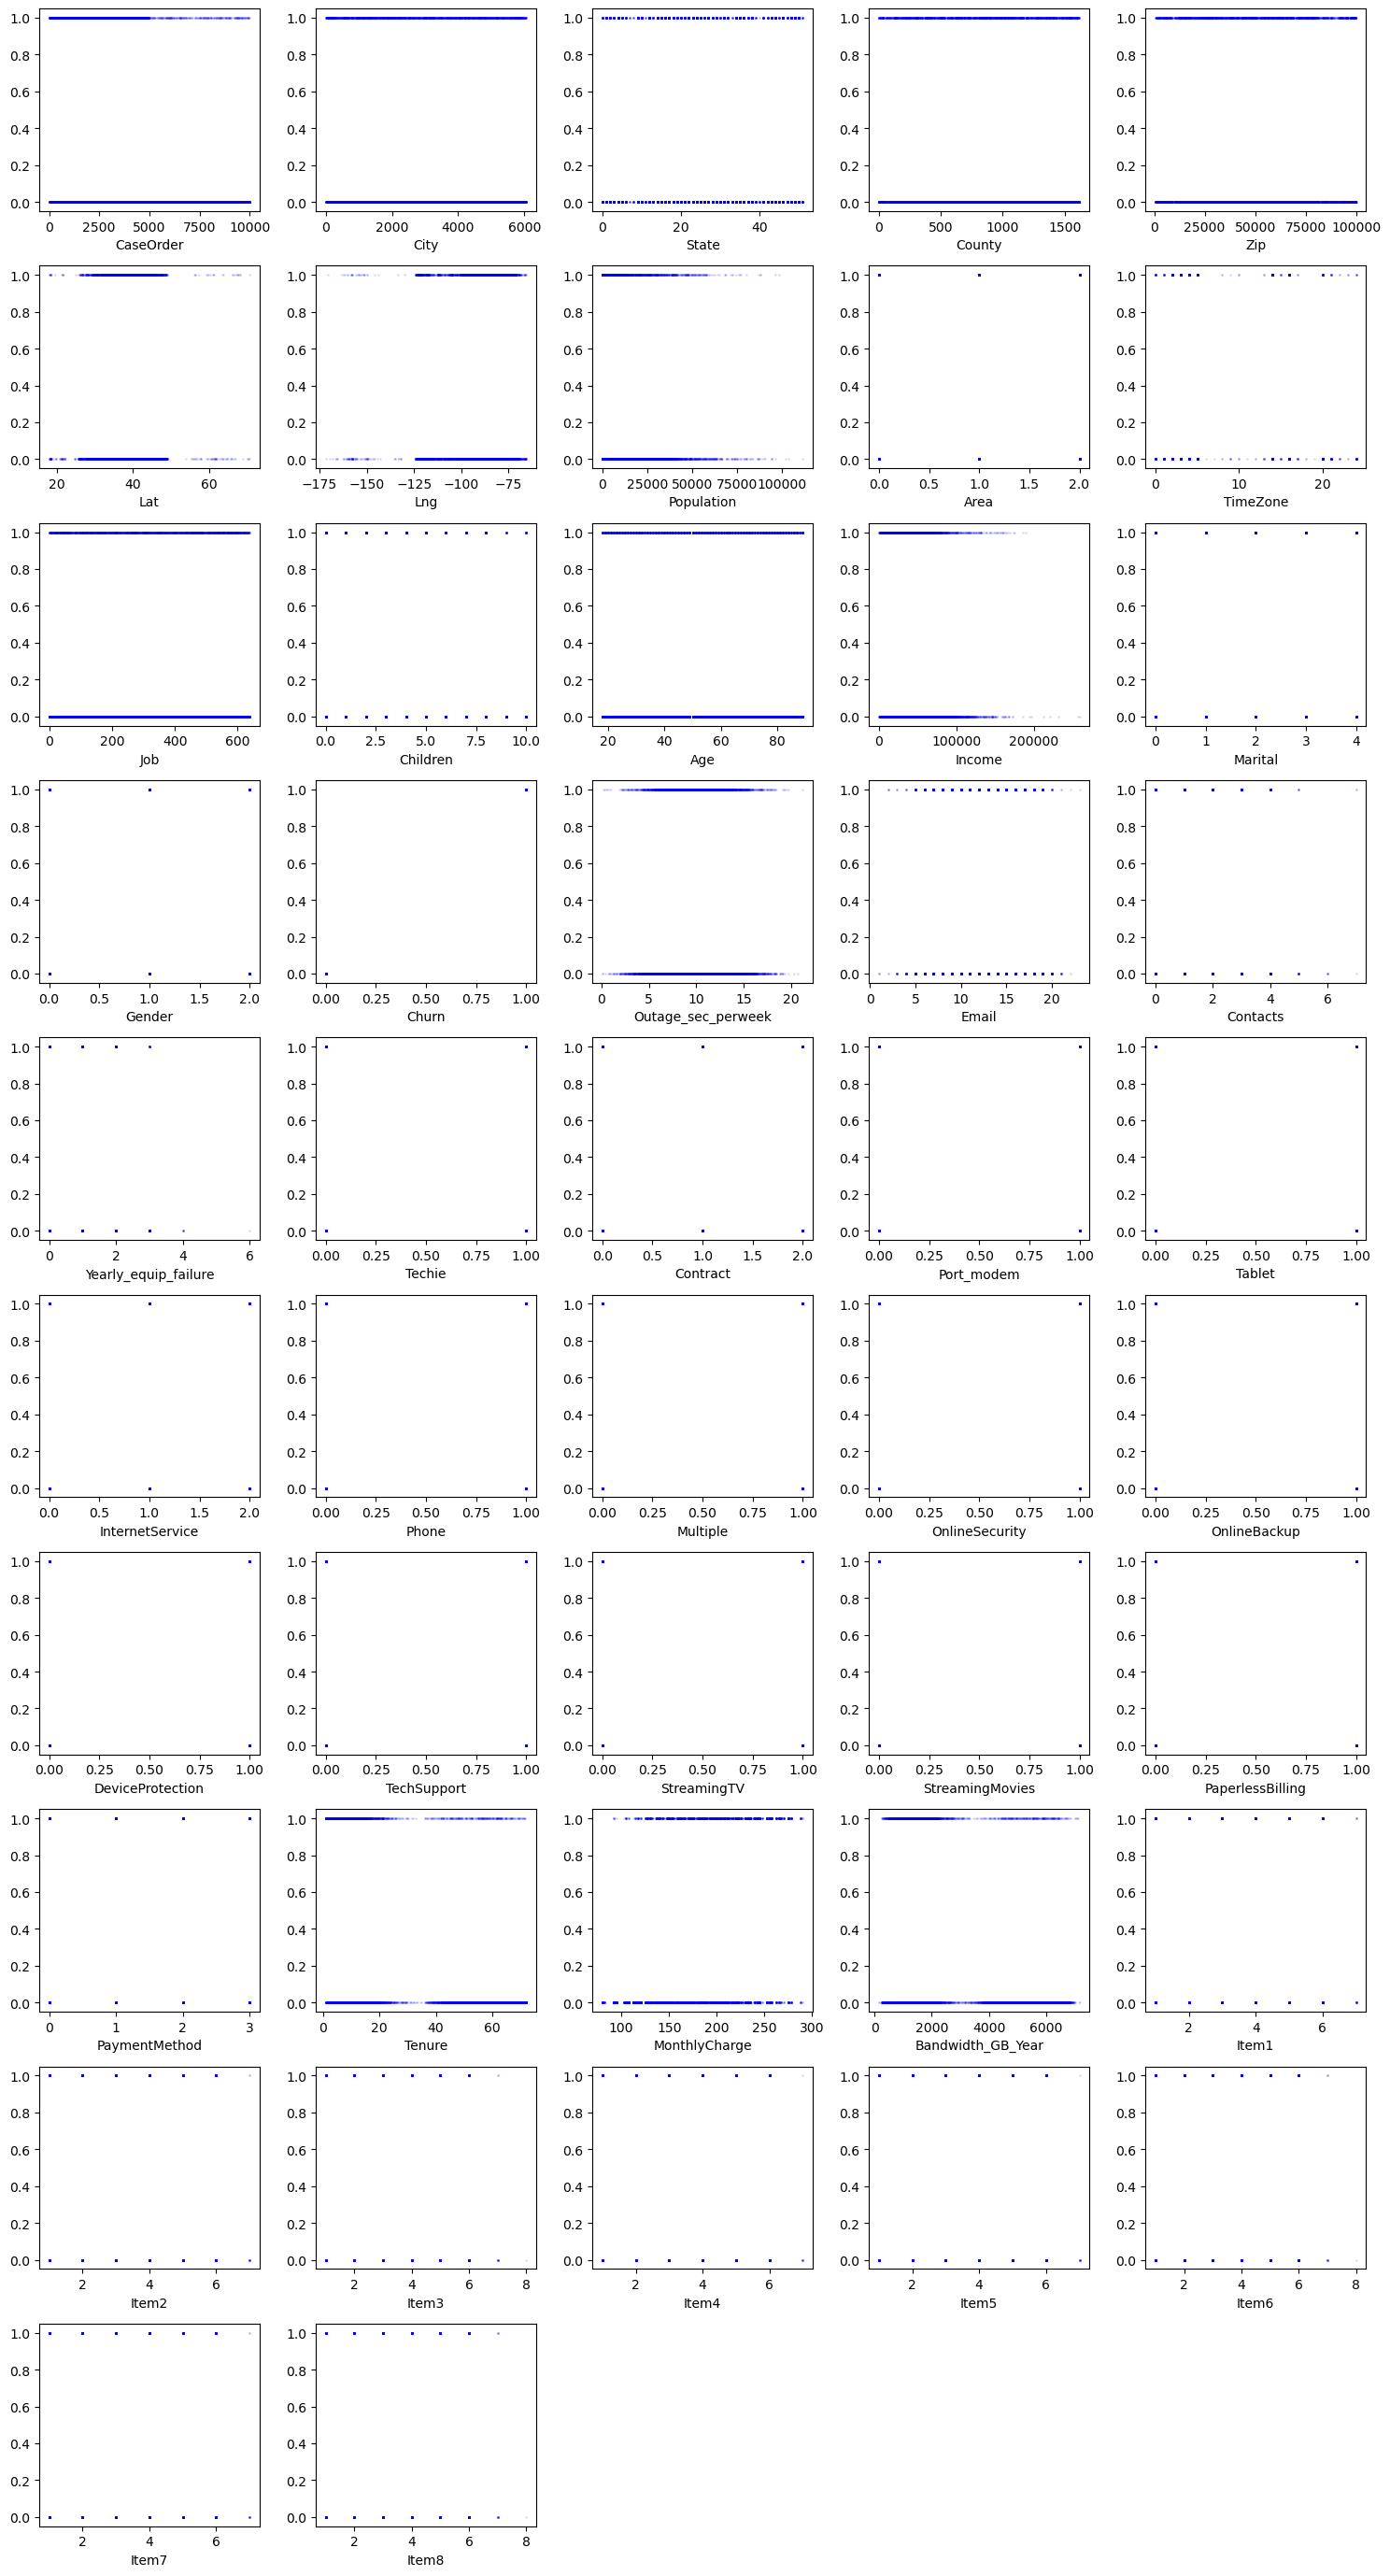

Wall time: 14.6 s


In [11]:
%%time
#calling the plt_summary to the num DataFrame
plt_summary(df_num,'target_scat',target)

#### Variables Correlation:

*Function plot_corr_ellipses() imported and modified From text Book "Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python",(Bruce et al.,2020) - The associated GitHub code repository 

https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%201%20-%20Exploratory%20Data%20Analysis.ipynb

In [12]:
'''
From text Book "Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python"
The associated GitHub code repository 
'''

from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)
        ax.grid (True, color = "grey", linewidth = "0.5", linestyle = "-")
    return ec


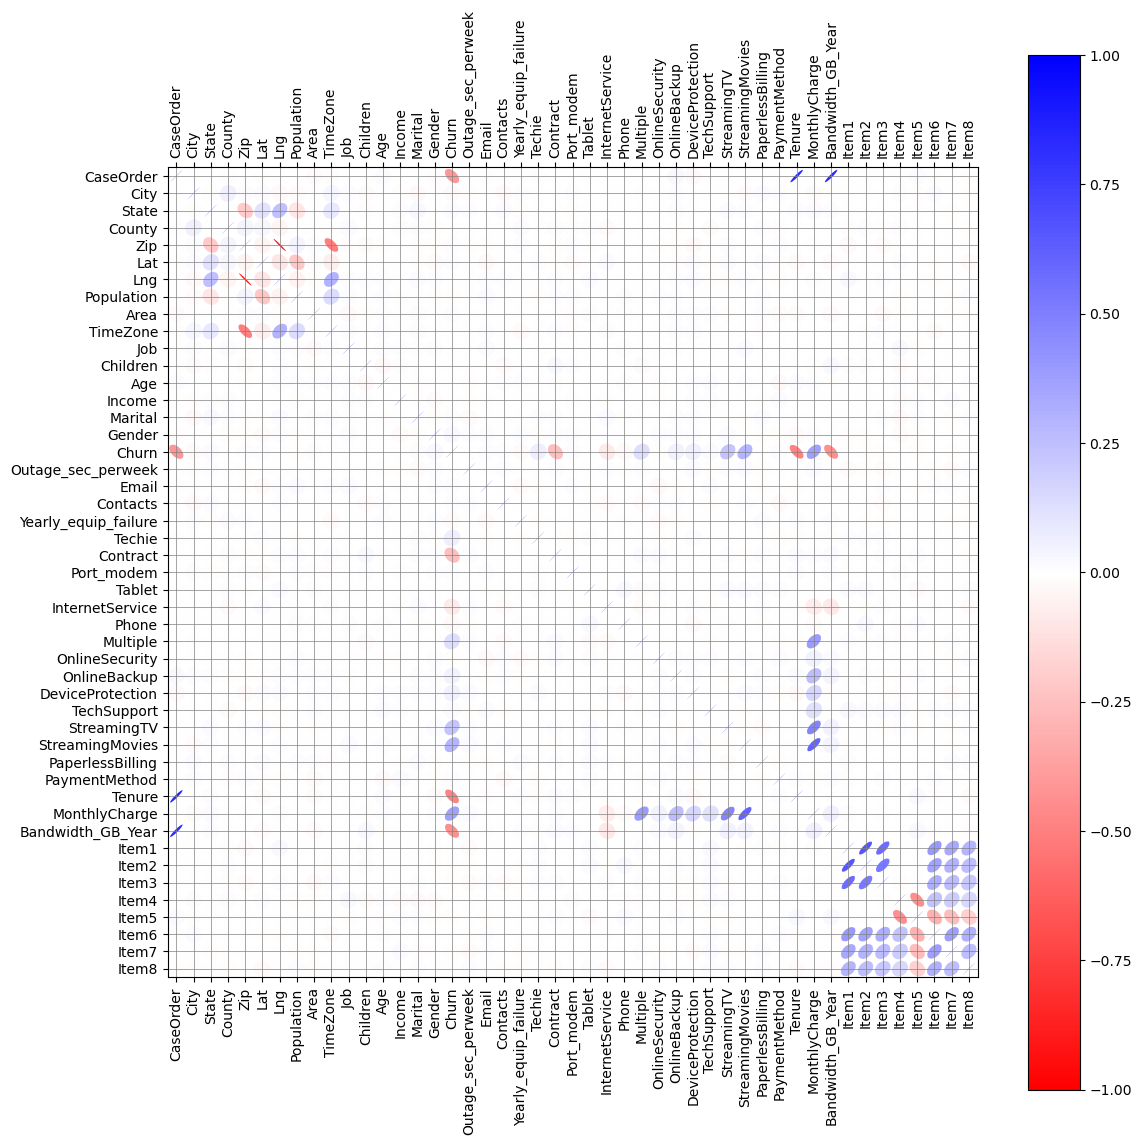

In [13]:
ax= plot_corr_ellipses(df_num.corr(), figsize=(12, 12), cmap='bwr_r')
plt.colorbar(ax)
plt.tight_layout()
plt.show()

##### PCA:

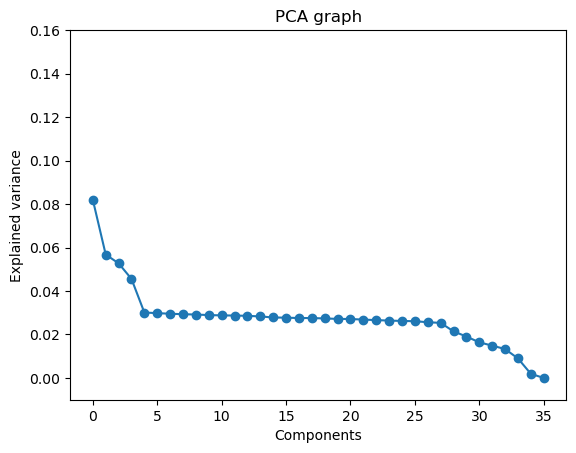

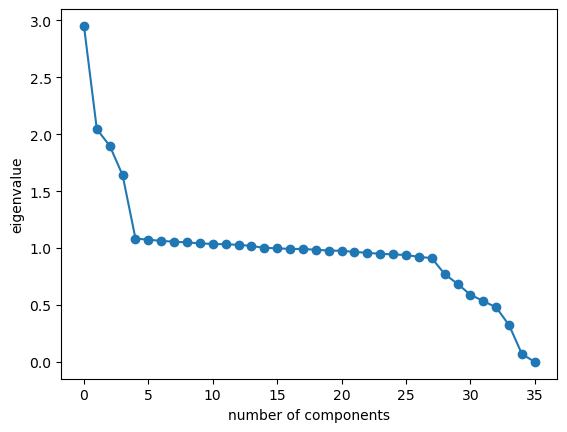

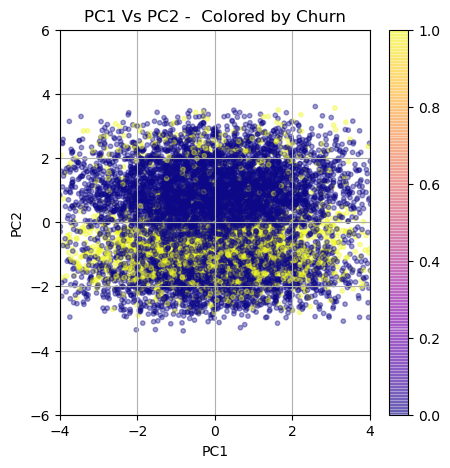

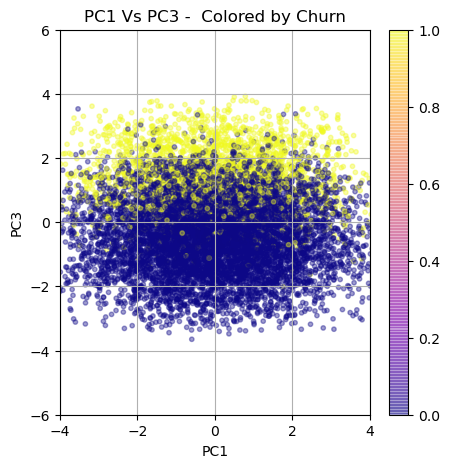

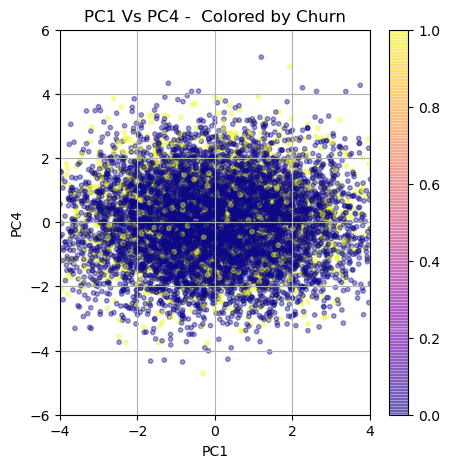

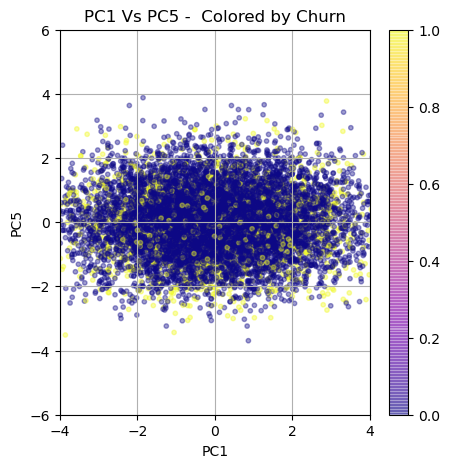

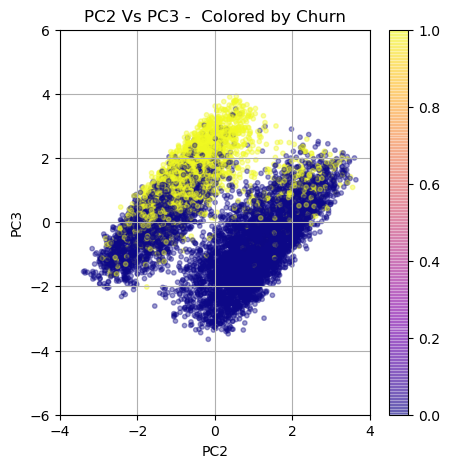

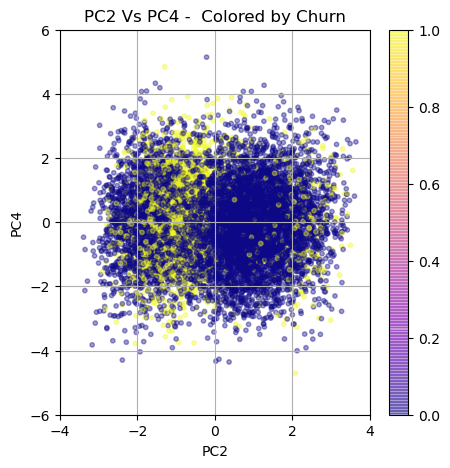

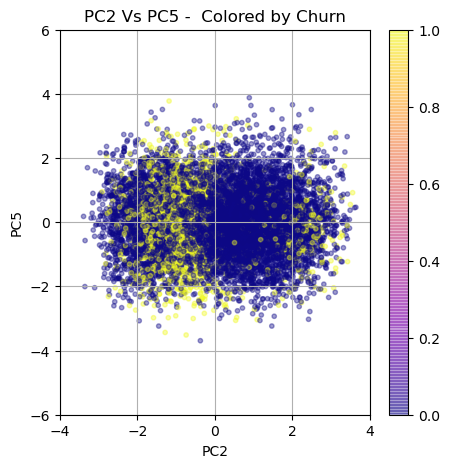

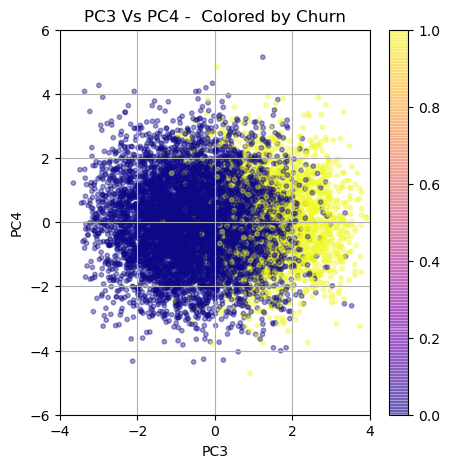

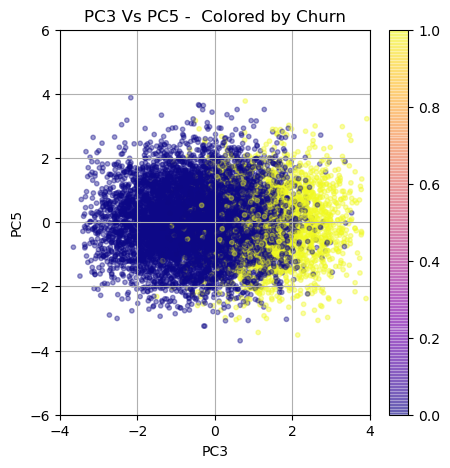

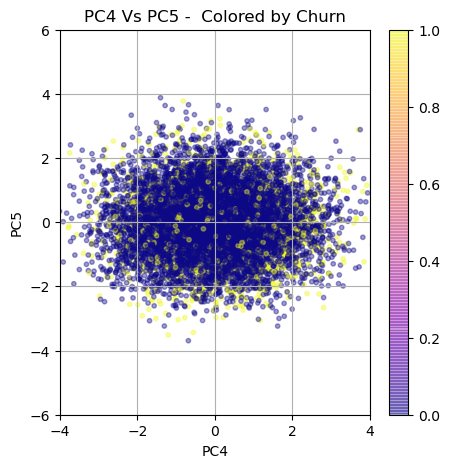

Sorted by: PC3


PC1       PC2       PC3       PC4       PC5  \
MonthlyCharge         0.001285  0.364382  0.602709  0.029649  0.007048   
StreamingMovies       0.008058  0.237248  0.394214  0.017016  0.050453   
Tenure                0.016285  0.584647  0.384277  0.067919  0.006886   
Bandwidth_GB_Year     0.016954  0.613473  0.339510  0.064940  0.002419   
StreamingTV           0.001095  0.198275  0.300744  0.009224  0.029070   
Multiple              0.000908  0.135973  0.263199  0.026448  0.085019   
OnlineBackup          0.005435  0.126439  0.147357  0.026541  0.171265   
DeviceProtection      0.002992  0.043178  0.138106  0.026027  0.196919   
TechSupport           0.024689  0.037298  0.070719  0.004073  0.130928   
Item5                 0.175623  0.037677  0.054942  0.583769  0.044271   
Item4                 0.145862  0.025952  0.039026  0.566678  0.012808   
Item3                 0.400198  0.023213  0.032689  0.278817  0.016708   
OnlineSecurity        0.000636  0.036248  0.032530  0.011443  0.172458   
Outage_sec_perweek    0.017867  0.017278  0.029656  0.012844  0.048228   
Item2                 0.433652  0.030724  0.027409  0.281293  0.022663   
Phone                 0.005255  0.006482  0.026641  0.034715  0.168404   
Gender                0.006606  0.000282  0.025137  0.005140  0.163742   
Children              0.004062  0.006996  0.022799  0.027233  0.256007   
PaymentMethod         0.002029  0.005287  0.018139  0.010812  0.209343   
Yearly_equip_failure  0.007586  0.010157  0.018031  0.005670  0.025611   
Item1                 0.458524  0.026273  0.018001  0.279258  0.015098   
Item8                 0.308510  0.005864  0.016932  0.130530  0.035341   
InternetService       0.004945  0.090356  0.014500  0.008043  0.178073   
Age                   0.006543  0.005773  0.014261  0.028575  0.314819   
Email                 0.008841  0.016370  0.014198  0.005790  0.298975   
Job                   0.001041  0.003845  0.013714  0.030533  0.326489   
Item6                 0.404580  0.000825  0.013588  0.182438  0.001838   
Techie                0.008068  0.007134  0.013185  0.023330  0.177039   
Tablet                0.016426  0.009390  0.010142  0.000230  0.192382   
Marital               0.001545  0.000925  0.007686  0.046163  0.347636   
Income                0.001293  0.003168  0.007672  0.025195  0.044314   
Contract              0.001566  0.028128  0.005922  0.019875  0.156791   
Port_modem            0.000960  0.010358  0.004830  0.014175  0.146567   
Contacts              0.009033  0.007482  0.004506  0.010949  0.216367   
Item7                 0.358079  0.001028  0.001613  0.179957  0.004528   
PaperlessBilling      0.005597  0.003479  0.001231  0.007867  0.302491   

                           PC6       PC7       PC8       PC9      PC10  \
MonthlyCharge         0.003271  0.027586  0.008492  0.010440  0.020245   
StreamingMovies       0.106949  0.037212  0.325792  0.224559  0.186272   
Tenure                0.028829  0.012427  0.001135  0.037304  0.001698   
Bandwidth_GB_Year     0.003731  0.007333  0.012940  0.010799  0.016610   
StreamingTV           0.080746  0.014053  0.208239  0.041458  0.236647   
Multiple              0.023985  0.127042  0.238867  0.294987  0.241846   
OnlineBackup          0.172518  0.136405  0.104502  0.084772  0.089049   
DeviceProtection      0.210258  0.266805  0.031075  0.171872  0.358288   
TechSupport           0.138021  0.141013  0.249824  0.239382  0.059862   
Item5                 0.014975  0.001318  0.014061  0.002230  0.006553   
Item4                 0.012393  0.011625  0.005350  0.000447  0.017531   
Item3                 0.020223  0.002148  0.023312  0.003391  0.000432   
OnlineSecurity        0.189093  0.133718  0.152777  0.279610  0.152857   
Outage_sec_perweek    0.185549  0.294545  0.051296  0.037449  0.275553   
Item2                 0.001292  0.014046  0.031478  0.004271  0.013383   
Phone                 0.182420  0.176766  0.399725  0.135697  0.290586   
Gender                0.288456

PC3 Main contributors sorted:  

 MonthlyCharge           0.602709
StreamingMovies         0.394214
Tenure                  0.384277
Bandwidth_GB_Year       0.339510
StreamingTV             0.300744
Multiple                0.263199
OnlineBackup            0.147357
DeviceProtection        0.138106
TechSupport             0.070719
Item5                   0.054942
Item4                   0.039026
Item3                   0.032689
OnlineSecurity          0.032530
Outage_sec_perweek      0.029656
Item2                   0.027409
Phone                   0.026641
Gender                  0.025137
Children                0.022799
PaymentMethod           0.018139
Yearly_equip_failure    0.018031
Item1                   0.018001
Item8                   0.016932
InternetService         0.014500
Age                     0.014261
Email                   0.014198
Job                     0.013714
Item6                   0.013588
Techie                  0.013185
Tablet                  0.010142
Marital  

In [14]:
#Principal Component Analysis

df_numpca =df_num.copy()

#Dropping target column
df_numpca.drop(columns=target,inplace=True)

#Dropping irrelevant columns
drop_cols = ['CaseOrder','City','State','County','Zip','Lng','Lat','Population','Area','TimeZone']
df_numpca.drop(columns=drop_cols,inplace=True)
numerics = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numpca = df_numpca.select_dtypes(include=numerics)

#Principal Component Analysis and plot
df_numpca_normalized=(df_numpca-df_numpca.mean())/df_numpca.std()
pca= PCA(n_components=df_numpca.shape[1])
pca.fit(df_numpca_normalized)
pca_names=['PC'+str(i) for i in range (1,len(df_numpca.columns)+1)]
df_numpca_pca=pd.DataFrame(pca.transform(df_numpca_normalized), columns = [*pca_names])

plt.plot(pca.explained_variance_ratio_,'o-')
plt.title('PCA graph')
plt.xlabel('Components')
plt.ylabel('Explained variance')
plt.ylim([-0.01,0.16])
#plt.xlim([-1,40])
plt.show()

#Eigenvalues and plot
cov_matrix= np.dot(df_numpca_normalized.T,df_numpca_normalized)/df_numpca.shape[0]
eigenvalues =[np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

plt.plot(eigenvalues,'o-')
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show()

#Loadings
loadings = pd.DataFrame(pca.components_.T,columns = [*pca_names],index=df_numpca.columns)
pca_xplots = [(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)]
for j,k in (pca_xplots):
    plt.figure(figsize=(5,5))
    plt.scatter(df_numpca_pca.iloc[:,j],df_numpca_pca.iloc[:,k],s=10,alpha=0.4,c=df_num.loc[:,target],cmap='plasma')
    plt.colorbar();plt.grid('on')
    plt.title(pca_names[j] +" Vs "+ pca_names[k]+" -  Colored by " + target );plt.xlabel(pca_names[j]);plt.ylabel(pca_names[k])
    plt.ylim([-0.01,0.16]);plt.ylim([-6,6]);plt.xlim([-4,4])
    plt.show()

PCsortingcomponent=3
print('Sorted by: '+ pca_names[PCsortingcomponent-1])
display(loadings.abs().sort_values(by=pca_names[PCsortingcomponent-1],ascending =False))
print(pca_names[PCsortingcomponent-1] +' Main contributors sorted:  \n\n',loadings.iloc[:,PCsortingcomponent-1].abs().sort_values(ascending =False))
#display(loadings.abs().sort_values(by=pca_names,ascending =False))

##### Conclusion of Data Exploration:

* The bivariate correlations between the variables and the target variable showed preliminarily the main features that can be used in target prediction through the Log. Reg , this will be discussed later in the following sections.
* The correlation plot among all features revealed a high correlation among some features such as 'Tenure' and 'Bandwidth_GB_Year', this can be described as multicollinearity in the Log. Reg model.
* There is an effect of 'CaseOrder' variable, which supposed to be the data index, it obviously has a high correlation with some variables ( 'Tenure', 'Bandwidth_GB_Year' and also the target variable 'Churn')
* The PCA showed the PC3 is the most effective component of variation when it comes to the target variable, the variables contributed the most in PC3 are shown in the PCA results section, it is not the best way to determine the main features of regression, but it could give a preliminary overview.

## Part III: Data Preparation

#### C.  Summarize the data preparation process for logistic regression by doing the following:

##### 1.  Describe your data preparation goals and the data manipulations that will be used to achieve the goals.

data preparation goals:
- Utilizing the categorical variables in the Logistic Regression, by converting them into numeric form, and by splitting them into dummy variables to use only the most relevant component out of them.
- Minimizing the effect of possible multicollinearity, by removing the variables with redundant information.
- Excluding the insignificant variables from the model, depending on the p-values.
- Applying the Logistic Regression model to the most relevant combination of features by removing irrelevant and redundant variables.
- Ensuring the fulfillment of the Logistic Regression model assumptions.


##### 2.  Discuss the summary statistics, including the target variable and all predictor variables that you will need to gather from the data set to answer the research question.

+ Explained in "Exploring the Data" section. 

##### 3.  Explain the steps used to prepare the data for the analysis, including the annotated code.

- Converting categorical variables into numeric form (Done).
- Applying variance inflation factor test (VIF) and other tests to identify the variables with redundant information.
- Excluding the insignificant variables from the model, by iterating the modelling process with enhancement.
- Ensuring the residual values and distribution.

##### 4.  Generate univariate and bivariate visualizations of the distributions of variables in the cleaned data set. Include the target variable in your bivariate visualizations.

+ Explained in "Exploring the Data" section.

### Preparing for a Test model

In [15]:
# selecting only the numeric columns
numerics = ['uint8','uint32','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num_only = df_raw.select_dtypes(include=numerics)  # selecting only the numeric columns

In [16]:
lr_df=df_num_only

Initializing Test model

In [17]:
X=lr_df.copy()

# adding categorical columns excluded earlier 
catcols=[coln for coln in list(df_raw.columns) if coln not in list(X.columns)]
X[catcols]=df_raw.loc[:,catcols]

X=cat2num(X) # To be able to correlate the categorical variables
X= X.select_dtypes(include=numerics)  # removing the non-numeric columns
X=X.drop([target],axis=1) #dropping te target column from the predictors data set

X = sm.add_constant(X) #adding constant that will represent the intercept of the LR model

y = df_num[target] # assigning the target to vector y

In [18]:
# Splitting the data into train and test portions
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20)

In [19]:
%%time
# LR implementation
logistic_regression = sm.Logit(y_train,X_train)
fitted_model = logistic_regression.fit()
predictions =fitted_model.predict(X_test)
print(fitted_model.summary())

Optimization terminated successfully.
         Current function value: 0.225160
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7953
Method:                           MLE   Df Model:                           46
Date:                Thu, 15 Apr 2021   Pseudo R-squ.:                  0.6130
Time:                        13:12:07   Log-Likelihood:                -1801.3
converged:                       True   LL-Null:                       -4654.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.4082      0.889     -8.336      0.000      -9.150      -5.666

In [20]:
print(confusion_matrix(y_test, predictions>0.5))

[[1396  102]
 [ 124  378]]


model 0              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1498
           1       0.79      0.75      0.77       502

    accuracy                           0.89      2000
   macro avg       0.85      0.84      0.85      2000
weighted avg       0.89      0.89      0.89      2000

----------------------------------------------------------------------------------------------------



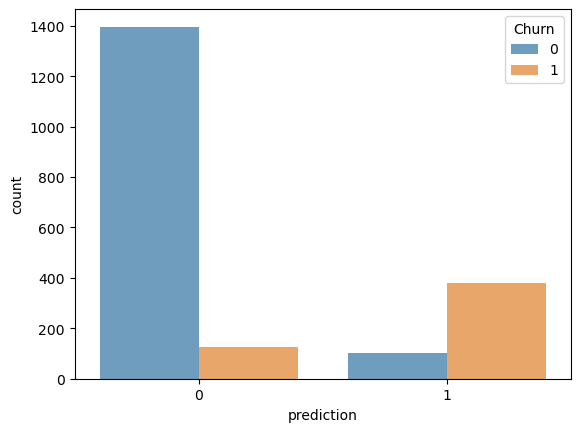

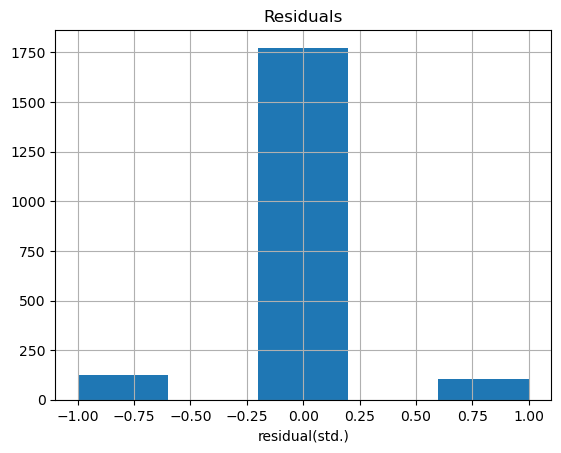

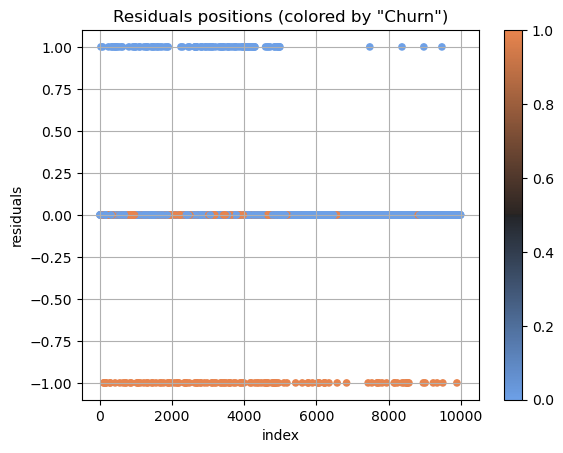

In [21]:
modelnumber=0
report=''
report=str("model "+str(modelnumber))+ classification_report(y_test,(predictions >=0.5).astype('int'))+'\n'+("-"*100)+'\n'+report
print(report)

# LR examination plots
sns.countplot(x = (fitted_model.predict(X_test)>=0.5).astype('int'),hue = y_test,alpha=0.7)
plt.xlabel('prediction')
plt.show()


residuals=((fitted_model.predict(X_test)>=0.5).astype('int'))- y_test
residuals.hist(bins = 5)
plt.title('Residuals')
plt.xlabel('residual(std.)')
plt.show()

plt.scatter(X_test.index,residuals,marker='o',s=20,alpha=10,c=y_test,cmap=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True))
plt.title('Residuals positions (colored by "'+ target+'")')
plt.xlabel('index')
plt.ylabel('residuals')
plt.colorbar();plt.grid('on')
plt.show()


In [22]:
fitted_model.pvalues.sort_values(ascending=True)

Contract                4.810898e-158
Tenure                   1.844850e-41
Bandwidth_GB_Year        5.311655e-30
Techie                   4.584947e-20
Age                      2.075125e-17
const                    7.698112e-17
Children                 4.243508e-12
OnlineSecurity           1.785841e-11
MonthlyCharge            2.287992e-11
InternetService          1.501303e-07
DeviceProtection         1.236988e-05
PaymentMethod            1.365064e-03
Phone                    4.293930e-03
OnlineBackup             8.608209e-03
Job                      2.192389e-02
StreamingMovies          3.666625e-02
Contacts                 4.937141e-02
Marital                  6.062221e-02
PaperlessBilling         7.227342e-02
Gender                   7.387787e-02
Multiple                 1.411925e-01
State                    1.606102e-01
TechSupport              1.952879e-01
Tablet                   1.960587e-01
Port_modem               2.138644e-01
Item8                    3.222154e-01
Yearly_equip

##### List of significant and non significant columns from the test model

In [23]:
signific=0.05
test_significant_columns = [fitted_model.pvalues.index[key] for (key,value) in enumerate(fitted_model.pvalues) if value <signific]
test_nonsign_columns = [fitted_model.pvalues.index[key] for (key,value) in enumerate(fitted_model.pvalues) if value >=signific]
print('test Significant columns: \n',test_significant_columns)
print('\n test Non Significant columns: \n',test_nonsign_columns)

test Significant columns: 
 ['const', 'Children', 'Age', 'Contacts', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Job', 'Techie', 'Contract', 'InternetService', 'Phone', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'StreamingMovies', 'PaymentMethod']

 test Non Significant columns: 
 ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Income', 'Outage_sec_perweek', 'Email', 'Yearly_equip_failure', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'City', 'State', 'County', 'Area', 'TimeZone', 'Marital', 'Gender', 'Port_modem', 'Tablet', 'Multiple', 'TechSupport', 'StreamingTV', 'PaperlessBilling']


###### Applying variance inflation factor test (VIF)

In [24]:
X_temp=X.copy()
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_temp.values, i) for i in range(X_temp.values.shape[1])]
vif["features"] = X_temp.columns
print(vif.round(1).sort_values(by="VIF Factor",ascending=False))

    VIF Factor              features
15       722.5     Bandwidth_GB_Year
13       712.7                Tenure
0        449.4                 const
14        13.2         MonthlyCharge
44        11.3       StreamingMovies
43         9.4           StreamingTV
2          9.4                   Zip
4          7.9                   Lng
36         6.0       InternetService
38         3.9              Multiple
1          3.3             CaseOrder
40         2.9          OnlineBackup
16         2.2                 Item1
17         1.9                 Item2
41         1.9      DeviceProtection
28         1.8              TimeZone
7          1.7                   Age
6          1.7              Children
18         1.6                 Item3
21         1.5                 Item6
20         1.4                 Item5
22         1.3                 Item7
42         1.3           TechSupport
19         1.3                 Item4
39         1.3        OnlineSecurity
3          1.3                   Lat
2

In [25]:
X_temp=X.copy()
droplist=['Age','Tenure','Job','State','PaperlessBilling','Phone','OnlineSecurity','DeviceProtection','Port_modem']# list of features to remove based on VIF and modelling iterations
X_temp=X_temp.drop(droplist,axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_temp.values, i) for i in range(X_temp.values.shape[1])]
vif["features"] = X_temp.columns
print(vif.round(1).sort_values(by="VIF Factor",ascending=False))

    VIF Factor              features
0        292.8                 const
2          9.3                   Zip
4          7.6                   Lng
12         6.5         MonthlyCharge
36         3.5       StreamingMovies
13         3.3     Bandwidth_GB_Year
1          3.2             CaseOrder
35         2.6           StreamingTV
14         2.2                 Item1
32         2.0              Multiple
15         1.9                 Item2
25         1.8              TimeZone
16         1.6                 Item3
33         1.5          OnlineBackup
19         1.5                 Item6
18         1.4                 Item5
17         1.3                 Item4
3          1.3                   Lat
20         1.3                 Item7
21         1.2                 Item8
5          1.1            Population
34         1.1           TechSupport
31         1.1       InternetService
11         1.0  Yearly_equip_failure
29         1.0              Contract
6          1.0              Children
7

##### List of significant and non significant columns from the test model,  VIF and modelling iterations

In [26]:
initial_significant_columns = [fitted_model.pvalues.index[key] for (key,value) in enumerate(fitted_model.pvalues) if value <signific]
initial_nonsign_columns = [fitted_model.pvalues.index[key] for (key,value) in enumerate(fitted_model.pvalues) if value >=signific]

initial_nonsign_columns.extend(test_nonsign_columns)
initial_nonsign_columns.extend(droplist)
initial_nonsign_columns = list(set(initial_nonsign_columns))

initial_significant_columns = [col for col in initial_significant_columns if col not in initial_nonsign_columns]

print('initial Significant columns: \n',initial_significant_columns)
print('\n initial Non Significant columns: \n',initial_nonsign_columns)

initial Significant columns: 
 ['const', 'Children', 'Contacts', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Techie', 'Contract', 'InternetService', 'OnlineBackup', 'StreamingMovies', 'PaymentMethod']

 initial Non Significant columns: 
 ['Tenure', 'Tablet', 'TechSupport', 'TimeZone', 'Email', 'Item3', 'Zip', 'City', 'StreamingTV', 'Outage_sec_perweek', 'Item4', 'Area', 'Item7', 'Lng', 'County', 'Marital', 'Item1', 'Yearly_equip_failure', 'Job', 'Item2', 'DeviceProtection', 'State', 'Age', 'CaseOrder', 'Multiple', 'Item8', 'Population', 'Income', 'Port_modem', 'Phone', 'OnlineSecurity', 'PaperlessBilling', 'Item6', 'Lat', 'Gender', 'Item5']


##### 5.  Provide a copy of the prepared data set.

In [27]:
D208_t2_input=X.copy()
D208_t2_input['Churn']=y
D208_t2_input.to_csv('D208_t2_model_input.csv', index = False)

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Part IV: Model Comparison and Analysis

#### D.  Compare an initial and a reduced logistic regression model by doing the following:

##### 1.  Construct an initial logistic regression model from all predictors that were identified in Part C2

#### Initial model

In [28]:
%%time
# initializing the model
X=lr_df.copy()

# adding categorical columns excluded earlier 
catcols=[coln for coln in list(df_raw.columns) if coln not in list(X.columns)]
X[catcols]=df_raw.loc[:,catcols]


X = sm.add_constant(X) #adding constant that will represent the intercept of the LR model
X=X[initial_significant_columns] #dropping nonsignificant columns from the predictors data set

# Adding dummy variables
dummy_cols = [dummy for dummy in categ_variables if dummy in X.columns]
X=pd.get_dummies(X,drop_first=True,columns=dummy_cols)


X=cat2num(X) # To be able to correlate the categorical variables
X= X.select_dtypes(include=numerics)  # removing the non-numeric columns
y = df_num[target] # assigning the target to vector y

# Splitting the data into train and test portions
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20)


# LR implementation
logistic_regression = sm.Logit(y_train,X_train)
fitted_model = logistic_regression.fit()
predictions =fitted_model.predict(X_test)
print(fitted_model.summary())

Optimization terminated successfully.
         Current function value: 0.225836
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7985
Method:                           MLE   Df Model:                           14
Date:                Thu, 15 Apr 2021   Pseudo R-squ.:                  0.6104
Time:                        13:14:33   Log-Likelihood:                -1806.7
converged:                       True   LL-Null:                       -4637.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -6.4380      

model 1              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1481
           1       0.82      0.78      0.80       519

    accuracy                           0.90      2000
   macro avg       0.87      0.86      0.87      2000
weighted avg       0.90      0.90      0.90      2000

----------------------------------------------------------------------------------------------------
model 0              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1498
           1       0.79      0.75      0.77       502

    accuracy                           0.89      2000
   macro avg       0.85      0.84      0.85      2000
weighted avg       0.89      0.89      0.89      2000

----------------------------------------------------------------------------------------------------



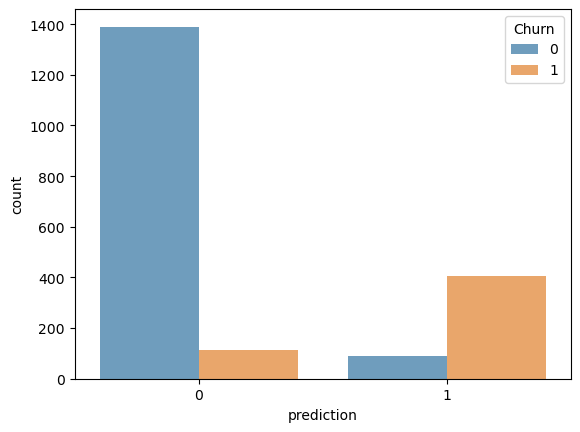

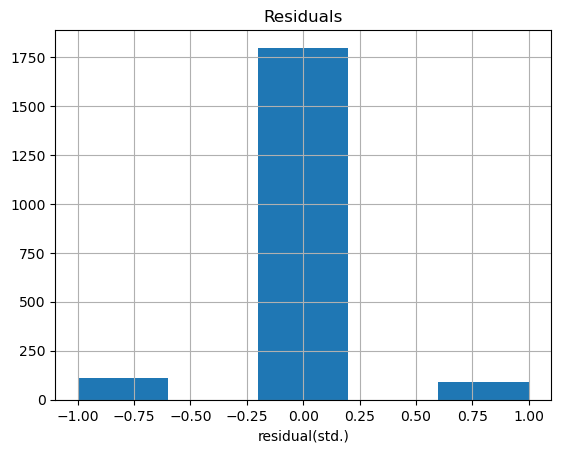

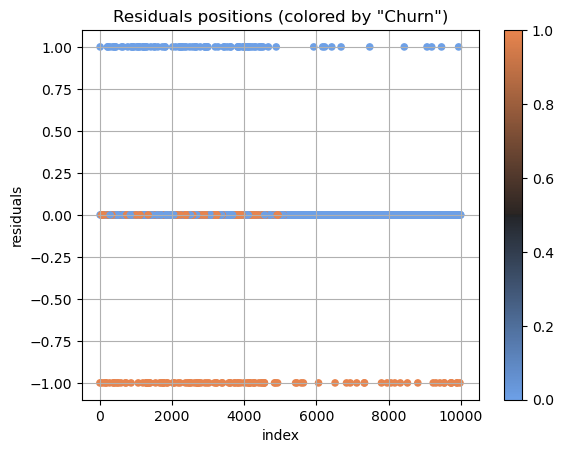

In [29]:
modelnumber=modelnumber+1
report=str("model "+str(modelnumber))+ classification_report(y_test,(predictions >=0.5).astype('int'))+'\n'+("-"*100)+'\n'+report
print(report)

# LR examination plots
sns.countplot(x = (fitted_model.predict(X_test)>=0.5).astype('int'),hue = y_test,alpha=0.7)
plt.xlabel('prediction')
plt.show()


residuals=((fitted_model.predict(X_test)>=0.5).astype('int'))- y_test
residuals.hist(bins = 5)
plt.title('Residuals')
plt.xlabel('residual(std.)')
plt.show()

plt.scatter(X_test.index,residuals,marker='o',s=20,alpha=10,c=y_test,cmap=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True))
plt.title('Residuals positions (colored by "'+ target+'")')
plt.xlabel('index')
plt.ylabel('residuals')
plt.colorbar();plt.grid('on')
plt.show()


##### 2.  Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.

Mainly based on statistical significance (P>|z|) value, with significance limit= 0.05 , the variables with P-value less than 0.05 represnt the rejection of the null hypthesis , mening that these variables are significant and relevant to the research question (prediction of 'Churn').
variables with with P-value larger than 0.05 represent failure to reject the null hypthesis meaning that the probability of giving them 0 coeeficient (or excluding them from the model) can be a relevant decesion.

##### 3.  Provide a reduced logistic regression model.



Note: The output should include a screenshot of each model.

In [30]:
significant_columns = [fitted_model.pvalues.index[key] for (key,value) in enumerate(fitted_model.pvalues) if value <signific]
nonsign_columns = [fitted_model.pvalues.index[key] for (key,value) in enumerate(fitted_model.pvalues) if value >=signific]

nonsign_columns.extend(test_nonsign_columns)
nonsign_columns.extend(initial_nonsign_columns)
nonsign_columns.extend(droplist)
nonsign_columns = list(set(initial_nonsign_columns))

significant_columns = [col for col in significant_columns if col not in nonsign_columns]

print('initial Significant columns: \n',significant_columns)
print('\n initial Non Significant columns: \n',nonsign_columns)

initial Significant columns: 
 ['const', 'Children', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 'OnlineBackup_Yes', 'StreamingMovies_Yes', 'PaymentMethod_Electronic Check']

 initial Non Significant columns: 
 ['Tenure', 'Tablet', 'TechSupport', 'TimeZone', 'Email', 'Item3', 'Zip', 'City', 'StreamingTV', 'Outage_sec_perweek', 'Item4', 'Area', 'Item7', 'Lng', 'County', 'Marital', 'Item1', 'Yearly_equip_failure', 'Job', 'Item2', 'DeviceProtection', 'State', 'Age', 'CaseOrder', 'Multiple', 'Item8', 'Population', 'Income', 'Port_modem', 'Phone', 'OnlineSecurity', 'PaperlessBilling', 'Item6', 'Lat', 'Gender', 'Item5']


In [31]:
%%time
# initializing the model
X=lr_df.copy()

# adding categorical columns excluded earlier 
catcols=[coln for coln in list(df_raw.columns) if coln not in list(X.columns)]
X[catcols]=df_raw.loc[:,catcols]


X = sm.add_constant(X) #adding constant that will represent the intercept of the LR model

# Adding dummy variables
dummy_cols = [dummy for dummy in categ_variables if dummy in X.columns]
X=pd.get_dummies(X,drop_first=True,columns=dummy_cols)

X=X[significant_columns] #dropping nonsignificant columns from the predictors data set


X=cat2num(X) # To be able to correlate the categorical variables
X= X.select_dtypes(include=numerics)  # removing the non-numeric columns
y = df_num[target] # assigning the target to vector y

# Splitting the data into train and test portions
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20)


# LR implementation
logistic_regression = sm.Logit(y_train,X_train)
fitted_model = logistic_regression.fit()
predictions =fitted_model.predict(X_test)
print(fitted_model.summary())

Optimization terminated successfully.
         Current function value: 0.228375
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7988
Method:                           MLE   Df Model:                           11
Date:                Thu, 15 Apr 2021   Pseudo R-squ.:                  0.6048
Time:                        13:15:20   Log-Likelihood:                -1827.0
converged:                       True   LL-Null:                       -4622.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -6.2657      0.252    -24.897     

model 2              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1467
           1       0.84      0.79      0.81       533

    accuracy                           0.90      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.90      0.90      0.90      2000

----------------------------------------------------------------------------------------------------
model 1              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1481
           1       0.82      0.78      0.80       519

    accuracy                           0.90      2000
   macro avg       0.87      0.86      0.87      2000
weighted avg       0.90      0.90      0.90      2000

----------------------------------------------------------------------------------------------------
model 0              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1498
           1  

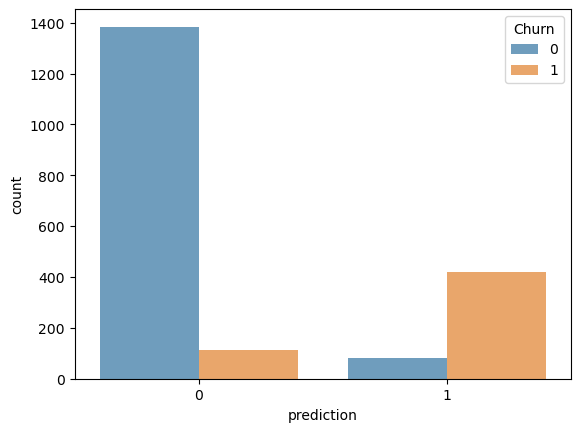

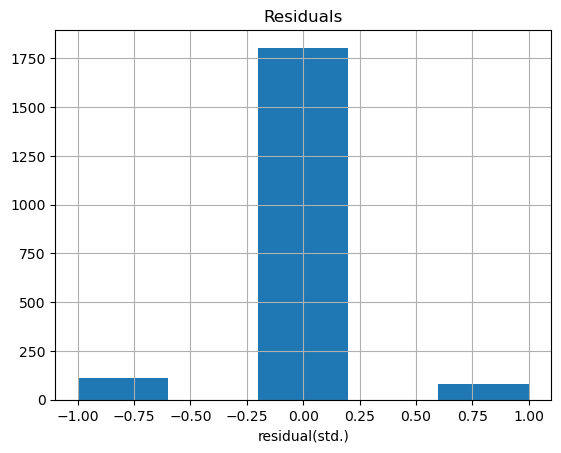

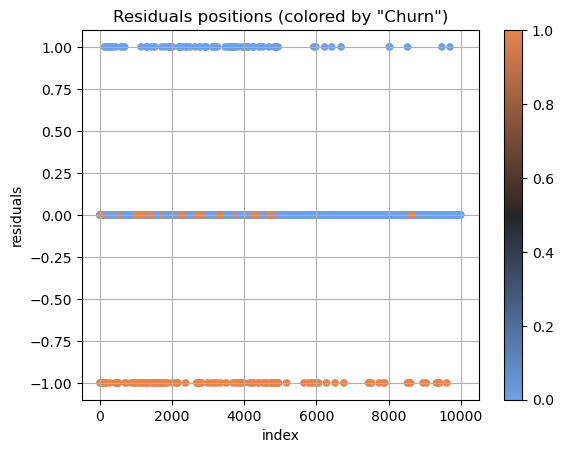

In [32]:
modelnumber=modelnumber+1
report=str("model "+str(modelnumber))+ classification_report(y_test,(predictions >=0.5).astype('int'))+'\n'+("-"*100)+'\n'+report
print(report)

# LR examination plots
sns.countplot(x = (fitted_model.predict(X_test)>=0.5).astype('int'),hue = y_test,alpha=0.7)
plt.xlabel('prediction')
plt.show()


residuals=((fitted_model.predict(X_test)>=0.5).astype('int'))- y_test
residuals.hist(bins = 5)
plt.title('Residuals')
plt.xlabel('residual(std.)')
plt.show()

plt.scatter(X_test.index,residuals,marker='o',s=20,alpha=10,c=y_test,cmap=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True))
plt.title('Residuals positions (colored by "'+ target+'")')
plt.xlabel('index')
plt.ylabel('residuals')
plt.colorbar();plt.grid('on')
plt.show()


##### List of used significant variables , and their relationship with the 'Churn' :

Number of columns:  13


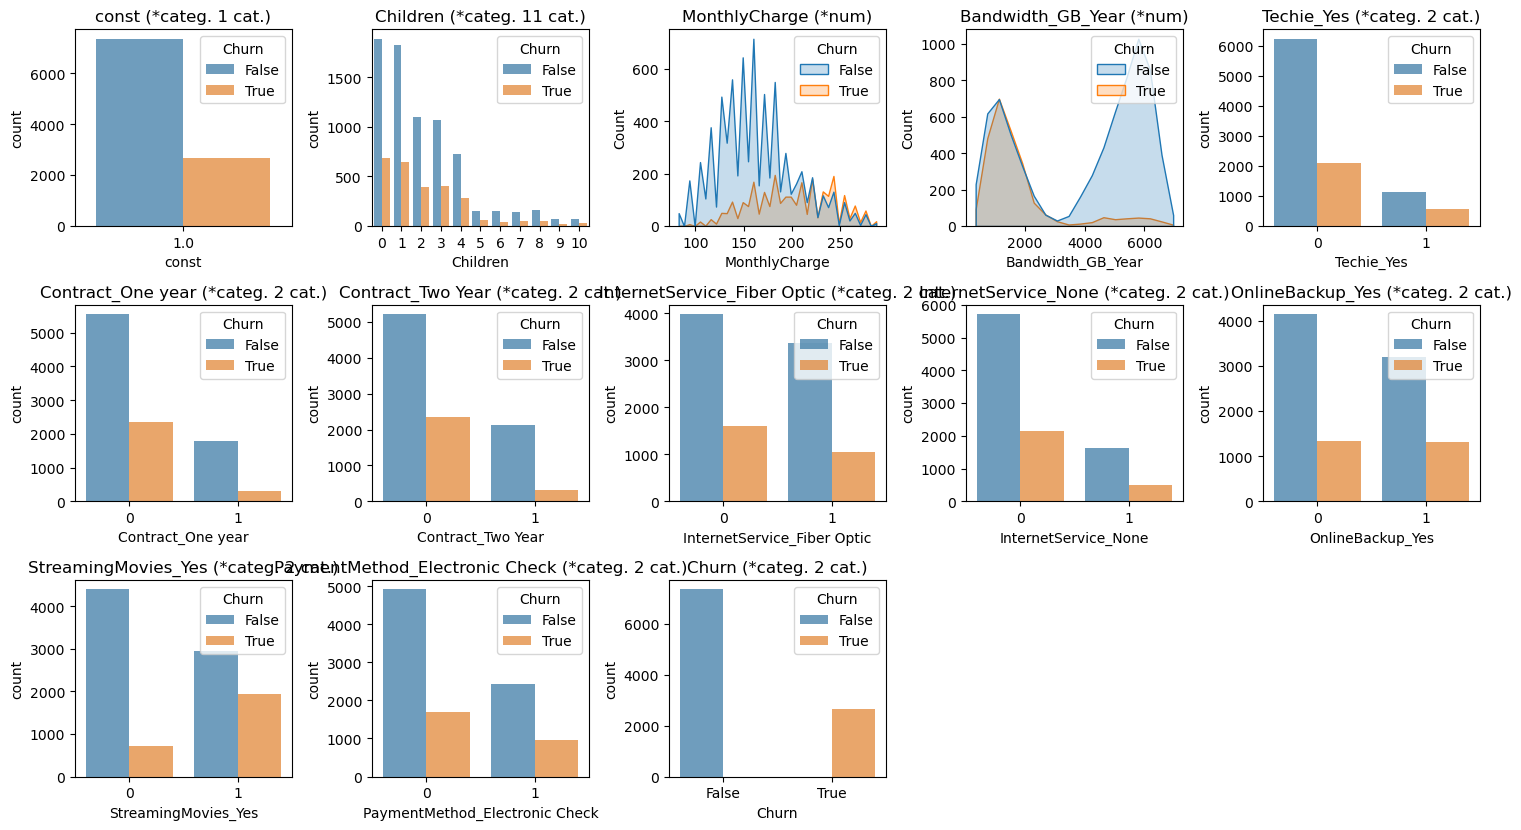

Wall time: 4.98 s


In [33]:
%%time
#calling the plt_summary to the Final input/output DataFrame
df_tst = X.copy()
df_tst[target]=y>0.5
plt_summary(df_tst,"target_histplot",target)

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### E.  Analyze the data set using your reduced logistic regression model by doing the following:

1.  Explain your data analysis process by comparing the initial and reduced logistic regression models, including the following elements:

•  the logic of the variable selection technique

Mainly based on statistical significance (P>|z|) value, with significance limit= 0.05 , the variables with P-value less than 0.05 represnt the rejection of the null hypthesis , mening that these variables are significant and relevant to the research question (prediction of 'Churn').
variables with with P-value larger than 0.05 represent failure to reject the null hypthesis meaning that the probability of giving them 0 coeeficient (or excluding them from the model) can be a relevant decesion.

The final set of variables has been chosen based on sequential iterations, by running several models, eliminating non-significant features, then rerunning the model again and so on, until reaching the final model,  not all the runs were included in this notebook (this notebook includes only a test model, initial model and a final reduced model).

•  the model evaluation metric


+ p-value is zero for almost all variables of the reduced model (all are significant)

+ The clasification report for the test portion of data,  which includes:

- Precision: counts of the percentage of correct classifications on one label.
- Recall : it means how many instances of one label we have been able to extract properly.
- F1- score:  Merge the score of Precision and Recall, using a harmonic average.


##### 2.  Provide the output and any calculations of the analysis you performed, including a confusion matrix.



Note: The output should include the predictions from the refined model you used to perform the analysis. 

In [34]:
D208_t2_output=X.copy()
D208_t2_output['Churn']=y
D208_t2_output['pred-Churn']=(fitted_model.predict(X)>=0.5).astype('int')
D208_t2_output['residuals']=(fitted_model.predict(X)>=0.5).astype('int')-y
D208_t2_output.to_csv('D208_t2_model_output.csv', index = False)

##### 3.  Provide the code used to support the implementation of the logistic regression models.

Included in this notebook

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Part V: Data Summary and Implications

#### F.  Summarize your findings and assumptions by doing the following:

##### 1.  Discuss the results of your data analysis, including the following elements:

##### •  a regression equation for the reduced model

In [35]:
# Final reg. model Equation:
equation = ''

for (feature,coef) in dict(fitted_model.params).items():
    equation = equation+' + (' + feature +' * '+str(np.round(coef,3))+ ') '
print('Log of the odds of '+target+' =  \n (',equation[12:])


Log of the odds of Churn =  
 ( -6.266)  + (Children * 0.062)  + (MonthlyCharge * 0.06)  + (Bandwidth_GB_Year * -0.001)  + (Techie_Yes * 1.06)  + (Contract_One year * -3.233)  + (Contract_Two Year * -3.364)  + (InternetService_Fiber Optic * -2.99)  + (InternetService_None * -1.114)  + (OnlineBackup_Yes * -0.448)  + (StreamingMovies_Yes * 0.338)  + (PaymentMethod_Electronic Check * 0.496) 


##### •  an interpretation of coefficients of the statistically significant variables of the model


The regression equation result represents the Log of the odds of 'Churn', meaning that the probability of churn is above 0.5 when the (Log of the odds of 'Churn') is positive, and the probability of churn is below 0.5 when the (Log of the odds of 'Churn') is negative, unstandardized inputs have been used for easier interpretation of the "Log of the odds" equation as following :

(note: *Some minor difference in the coef. values because of regenerating the models)


+ 'InternetService_Fiber Optic ':  
Using this service decreases the (Log of the odds of 'Churn') by -2.757. (holding other variables constant)., thus decreases the 'customer Churn" probability.


+ 'StreamingTV_Yes':  
Using this service increases the (Log of the odds of 'Churn') by 1.492. (holding other variables constant)., thus increases the 'customer Churn" probability.


+ 'StreamingMovies_Yes':  
Using this service increases the (Log of the odds of 'Churn') by 1.701. (holding other variables constant)., thus increases the 'customer Churn" probability.


+ 'Contract_One year' and 'Contract_Two Year':  
Using these kinds of contracts decreases the (Log of the odds of 'Churn') by -3.305 and -3.441 respectively. (holding other variables constant)., thus decreases the 'customer Churn" probability.


+ 'PaymentMethod_Electronic Check * 0.356':  
Using this type of payment increases the (Log of the odds of 'Churn') by  0.456. (holding other variables constant)., thus increases the 'customer Churn" probability.


etc...


##### •  the statistical and practical significance of the model

+ The model is statistically significant, all variables are statistically significant meaning that they are essential and can't be omitted (null hypothesis rejected)


+ All variables are practically meaningful and their significance can be noticed by using either countplots or histplots.


+ A very high accuracy of prediction has been achieved (> 90%)


##### •  the limitations of the data analysis


- The model accuracy couldn't be enhanced by reduction.

- Some observation values have been artificially created such as 'Tenure', 'MontlhyCharge' and 'Bandwidth' according to the (D207 D208 D209 Churn Data Consideration and Dictionary.pdf), meaning the presence of some bias in estimation specifically for the "brand new customers" (Heteroscedasticity), this can be noticed clearly from the position of residuals charts, the prediction for observations in the first half of the data set (index < 5000) wasn't as good as the predictions in the second half.

- The number of observations used in training the model was very high (8000 observations), trying to decrease this number had negatively affected the model, meaning that the model can't be considered highly robust, despite the high accuracy score achieved (> 90%).

https://careerfoundry.com/en/blog/data-analytics/what-is-logistic-regression/#:~:text=Here%20are%20a%20few%20takeaways%20to%20summarize%20what,analysis%2C%20and%20different%20types%20of%20logistic%20regression.%20

##### 2.  Recommend a course of action based on your results.

+ Based on the final model features and coefficients, some services and conditions are significantly contributing to 'customer Churn" probability positively or negatively.

+ StreamingTV and StreamingMovies services: 
Customers who use StreamingTV and StreamingMovies services are more likely to churn, such services should be reviewed and evaluated, as they negatively affect customer satisfaction.

+ Fiber Optic internet service:
Customers who use this service are less likely to churn, this service should get marketed and sold more.

+ customers who have one year and two years contracts are less likely to churn, the company should encourage customers to have these two kinds of contracts.

+ PaymentMethod_Electronic Check :
Customers who use this method for payment are more likely to churn, the company should encourage other payment options.


###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Part VI: Demonstration

#### G.  Provide a Panopto video recording that includes all of the following elements:
<a href="https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=8a3aa9f0-8b69-438a-a653-ad0b013b2b44" target="_blank"> Link to the Panopto Video </a>

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=8a3aa9f0-8b69-438a-a653-ad0b013b2b44

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### H.  List the web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.



I.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.



J.  Demonstrate professional communication in the content and presentation of your submission.

#### References:
    
1- Bruce, P. C., Bruce, A., & Gedeck, P. (2020). Practical statistics for data scientists: 50 essential concepts. Sebastopol, CA: O'Reilly Media, Incorporated.

2- https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%201%20-%20Exploratory%20Data%20Analysis.ipynb

3- (WGU) Predictive Modeling – D208 course materials and Labs

4- General Questions/Answers from https://stackoverflow.com/

5- Documentation of Python packages: pandas, matplotlib,numpy,seaborn and scipy

6- https://careerfoundry.com/en/blog/data-analytics/what-is-logistic-regression/#:~:text=Here%20are%20a%20few%20takeaways%20to%20summarize%20what,analysis%2C%20and%20different%20types%20of%20logistic%20regression.%20